In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [68]:
# Load dataset
columns = ['Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort', 'Transactions', 'Entities', 'PointsAdjust', 'Envergure', 'PointsNonAjust', 'Language']
df=pd.read_csv('./desharnais.txt', names=columns, comment='%', na_values='?', skipinitialspace=True, delimiter=',')

df.head()

,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language
0,1,1.0,4.0,85,12,5152,253,52,305,34,302,1
1,2,0.0,0.0,86,4,5635,197,124,321,33,315,1
2,3,4.0,4.0,85,1,805,40,60,100,18,83,1
3,4,0.0,0.0,86,5,3829,200,119,319,30,303,1
4,5,0.0,0.0,86,4,2149,140,94,234,24,208,1


In [69]:
# Missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Project         81 non-null     int64  
 1   TeamExp         79 non-null     float64
 2   ManagerExp      78 non-null     float64
 3   YearEnd         81 non-null     int64  
 4   Length          81 non-null     int64  
 5   Effort          81 non-null     int64  
 6   Transactions    81 non-null     int64  
 7   Entities        81 non-null     int64  
 8   PointsAdjust    81 non-null     int64  
 9   Envergure       81 non-null     int64  
 10  PointsNonAjust  81 non-null     int64  
 11  Language        81 non-null     int64  
dtypes: float64(2), int64(10)
memory usage: 7.7 KB


Project           0
TeamExp           2
ManagerExp        3
YearEnd           0
Length            0
Effort            0
Transactions      0
Entities          0
PointsAdjust      0
Envergure         0
PointsNonAjust    0
Language          0
dtype: int64

In [70]:
#Basic stats for dataset
#mean
# percentile for p=0.25 & 0.75
# third quartile/median
df.describe()

,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language
count,81.000000,79.000000,78.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,2.265823,2.666667,85.790123,11.716049,5046.308642,179.901235,122.333333,302.234568,27.629630,287.049383,1.555556
std,23.526581,1.336939,1.517574,1.147999,7.399721,4418.767228,143.314916,84.882124,179.676812,10.591795,185.108137,0.707107
min,1.000000,0.000000,0.000000,83.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,139.000000,99.000000,260.000000,28.000000,253.000000,1.000000
75%,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,223.000000,169.000000,382.000000,35.000000,350.000000,2.000000
max,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [71]:
# Duplicate rows
df.duplicated().sum()

np.int64(0)

<Axes: >

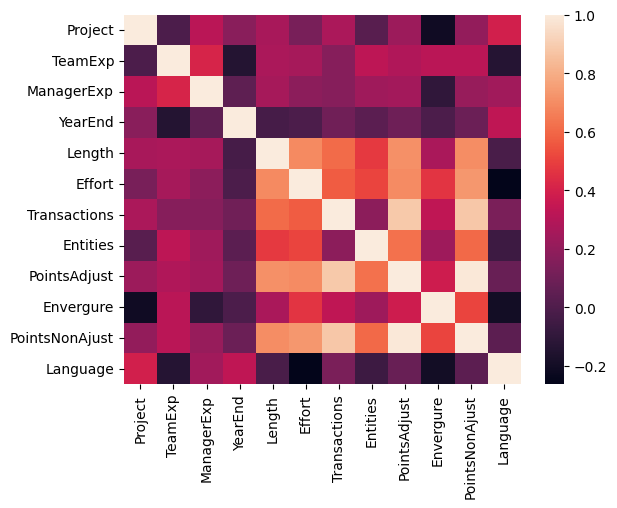

In [72]:
# Adequacy of data using heatmap
sns.heatmap(df.corr())

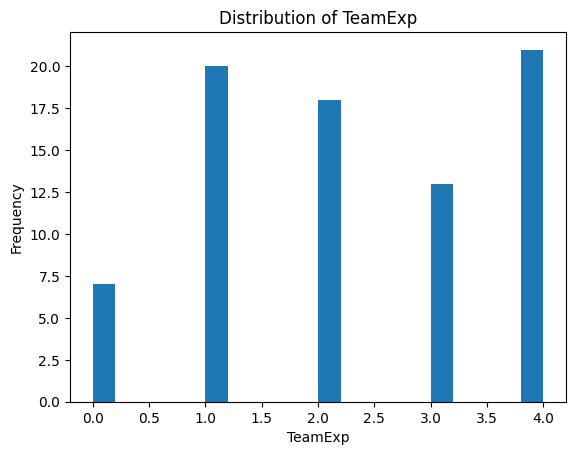

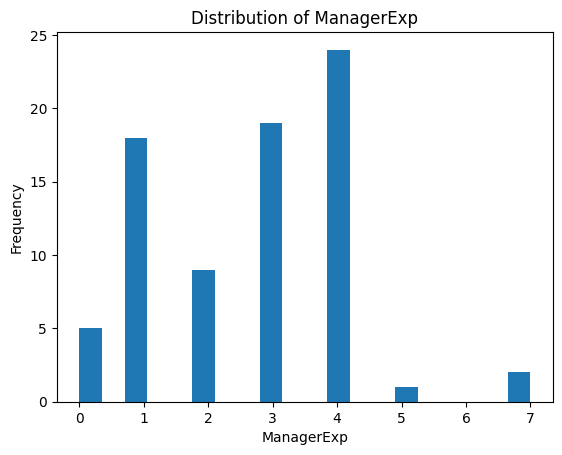

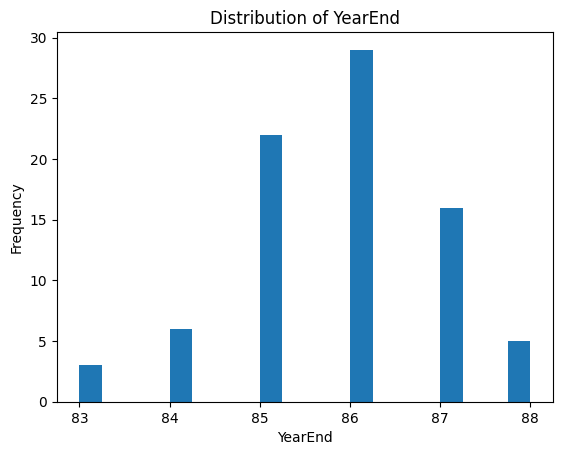

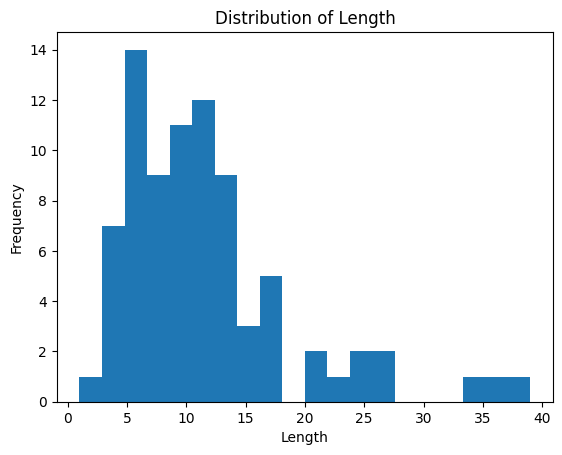

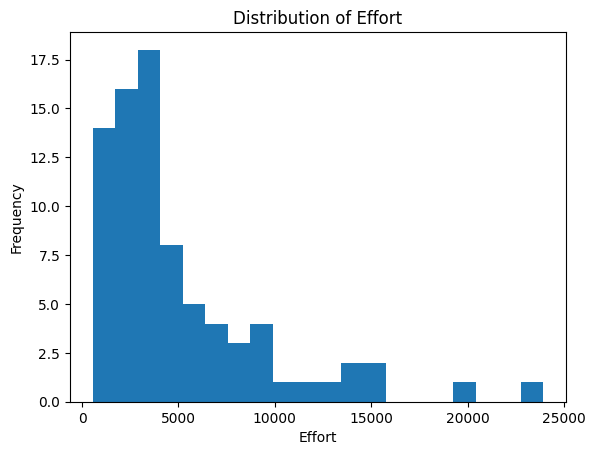

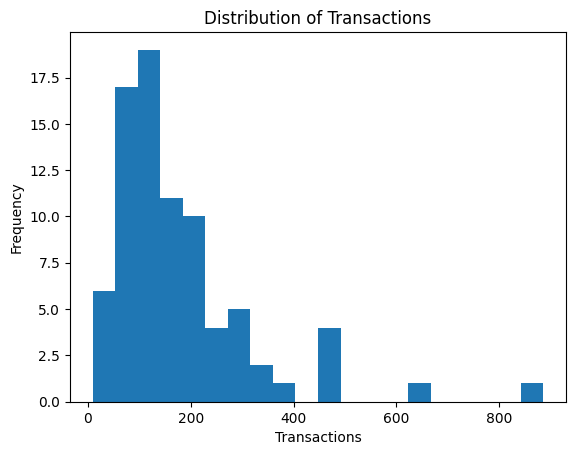

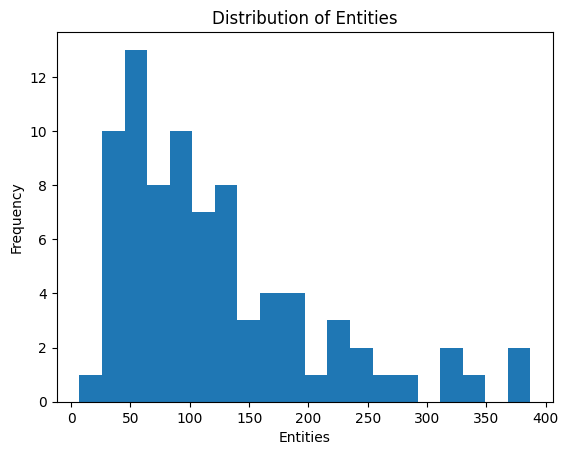

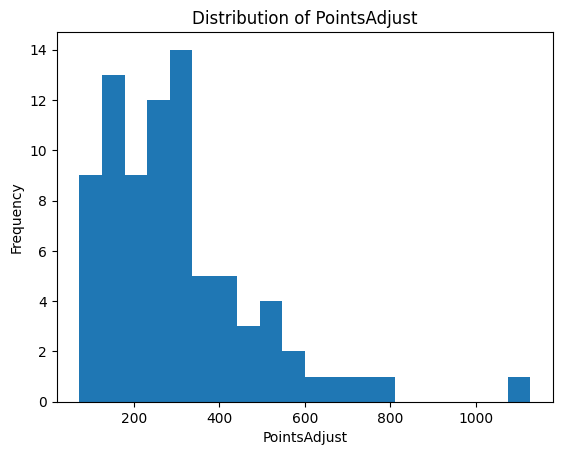

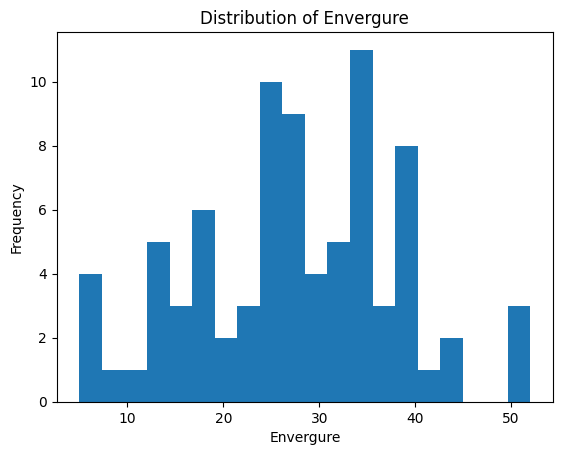

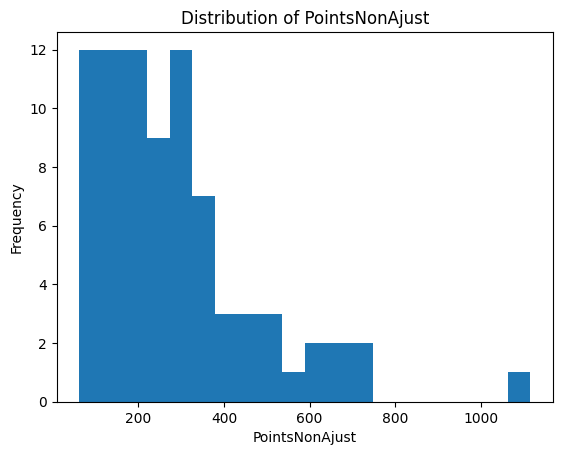

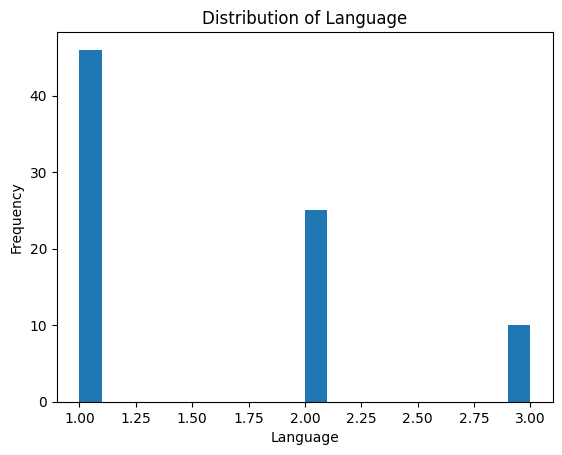

In [73]:
# Checking for class imbalance
for col in columns[1:]:
    df[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


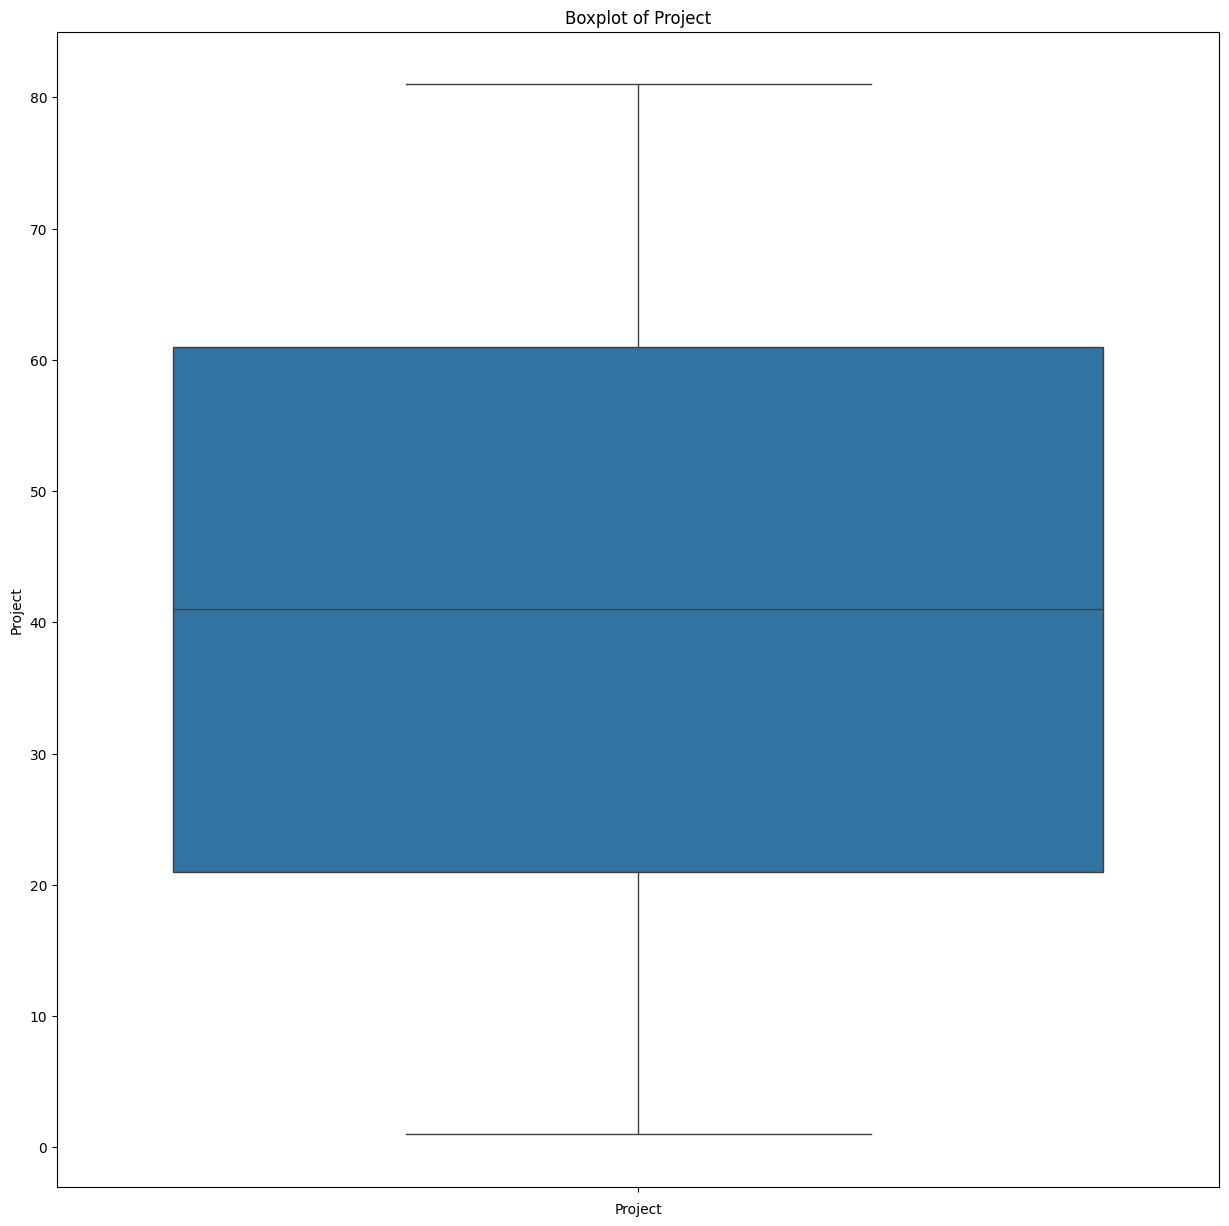

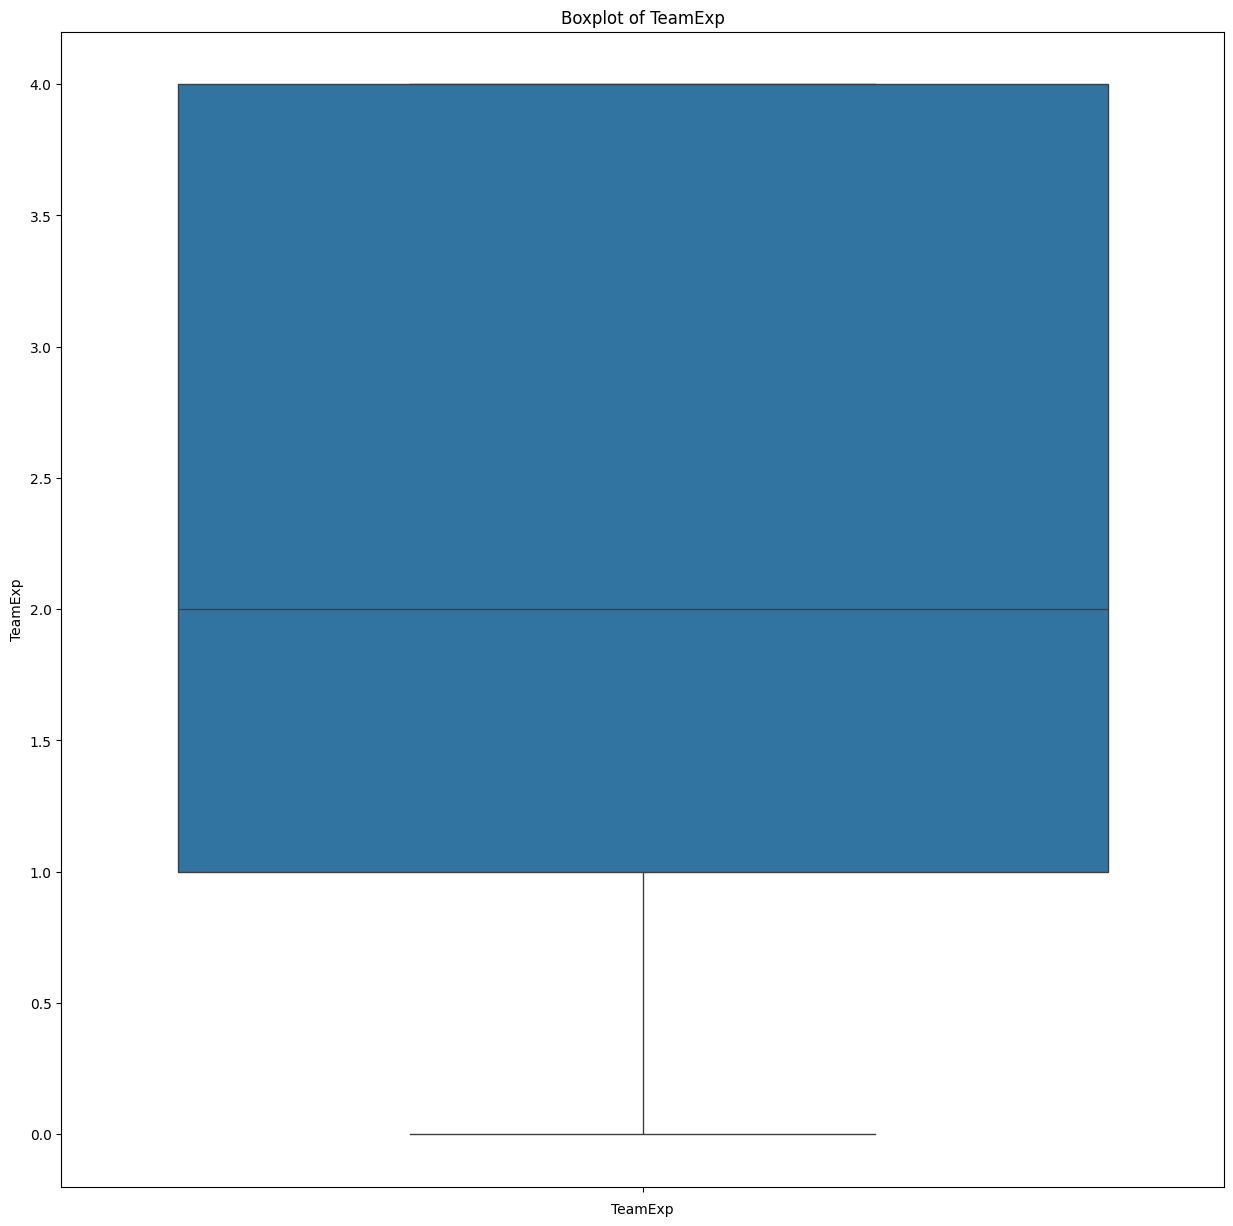

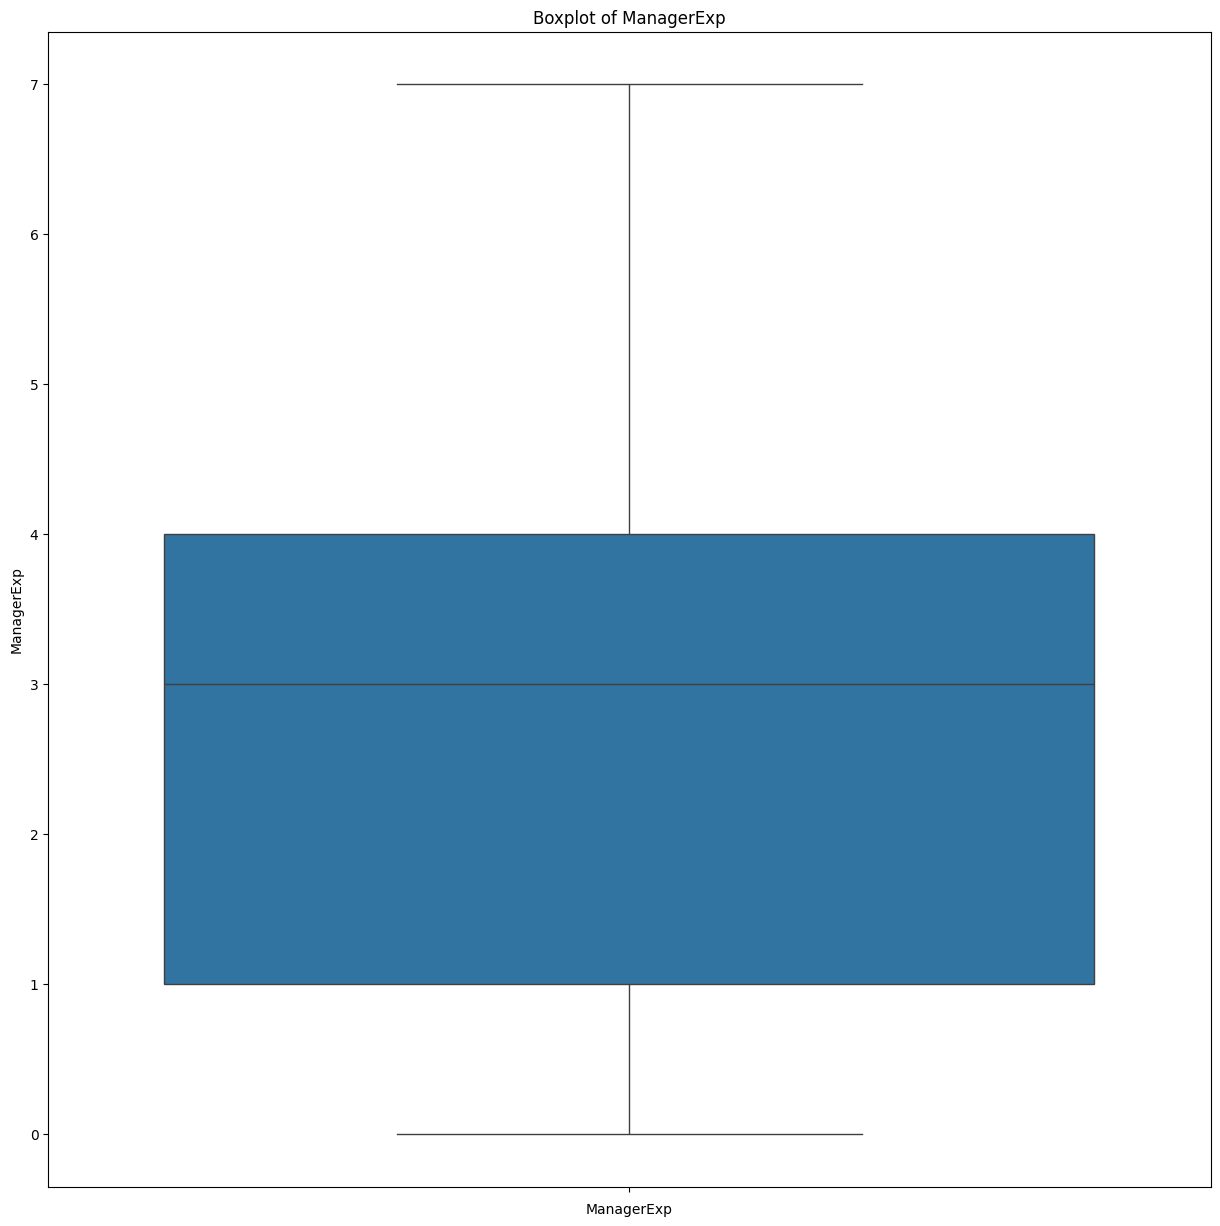

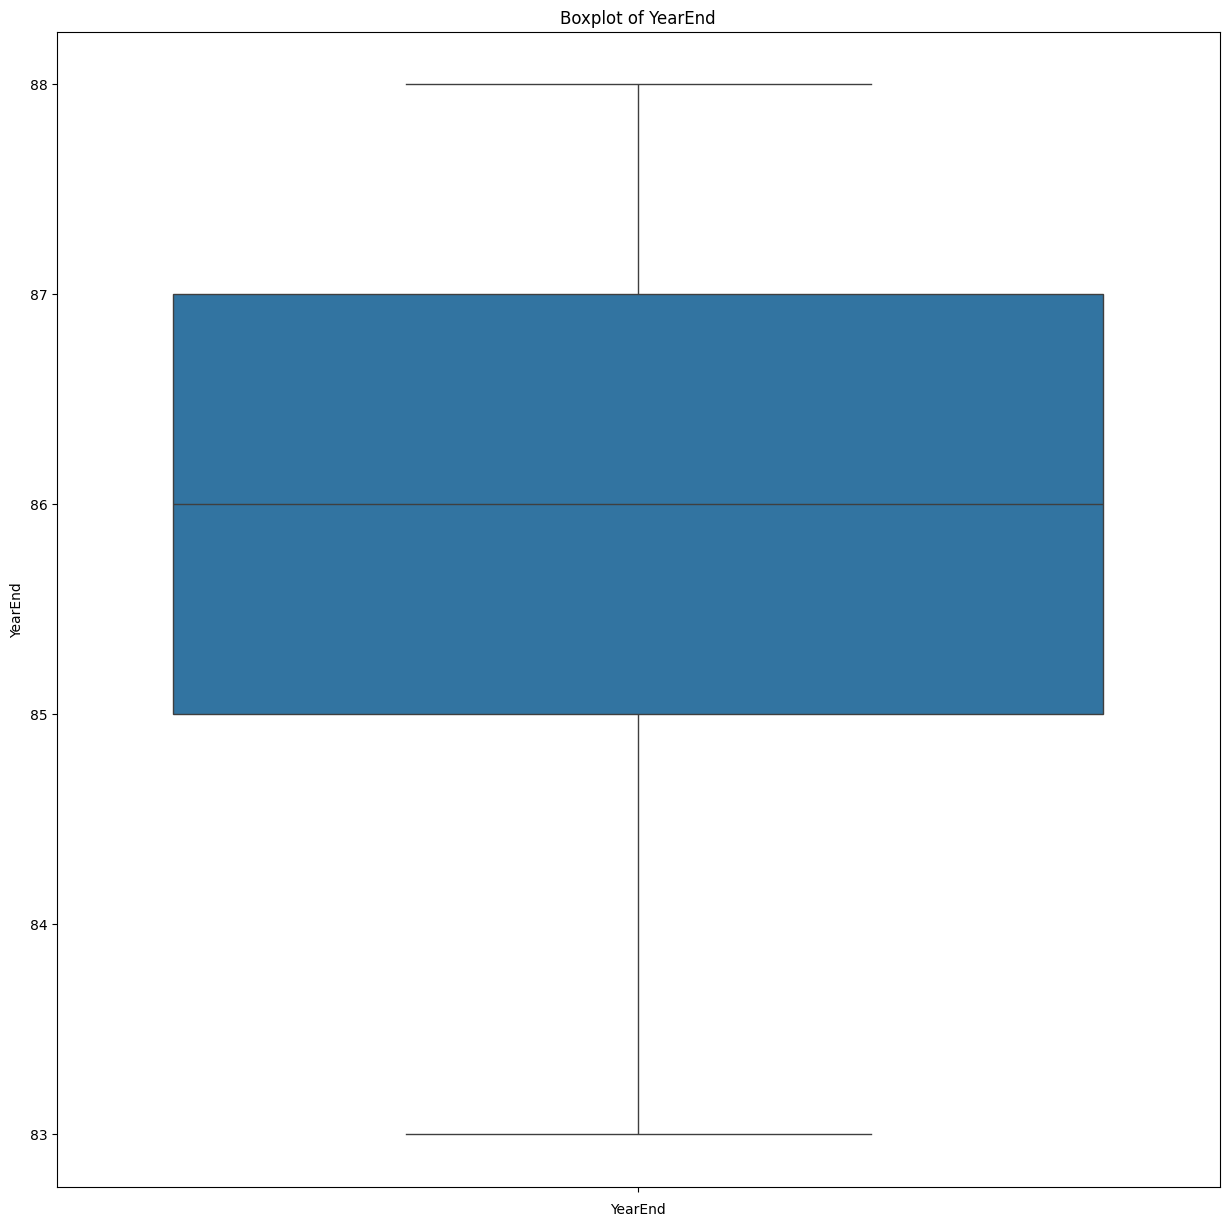

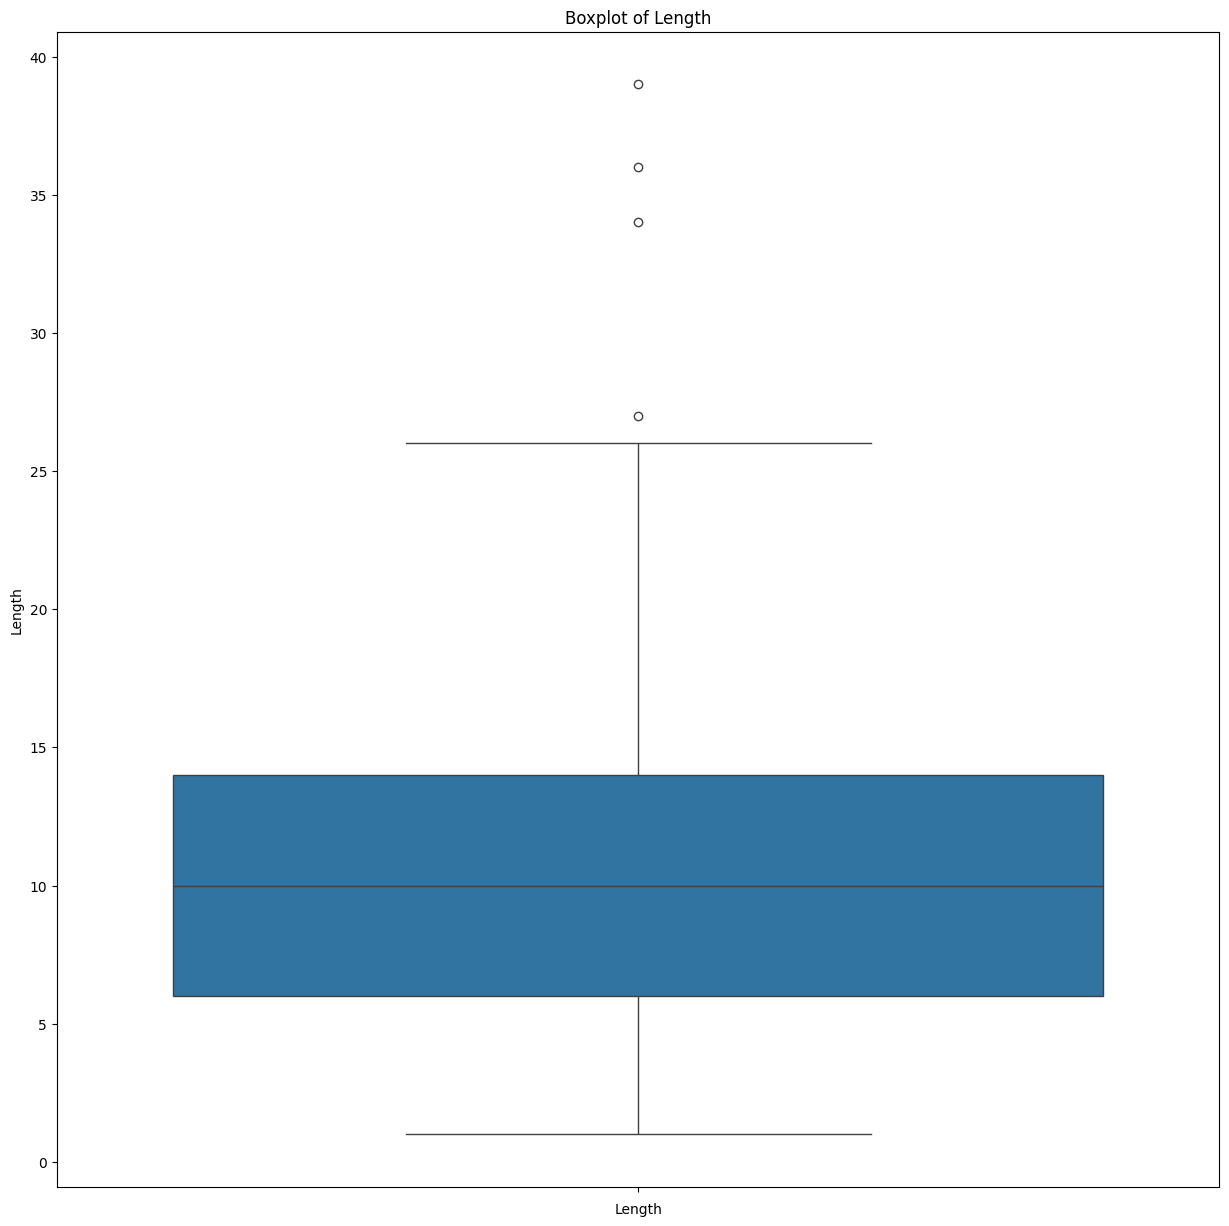

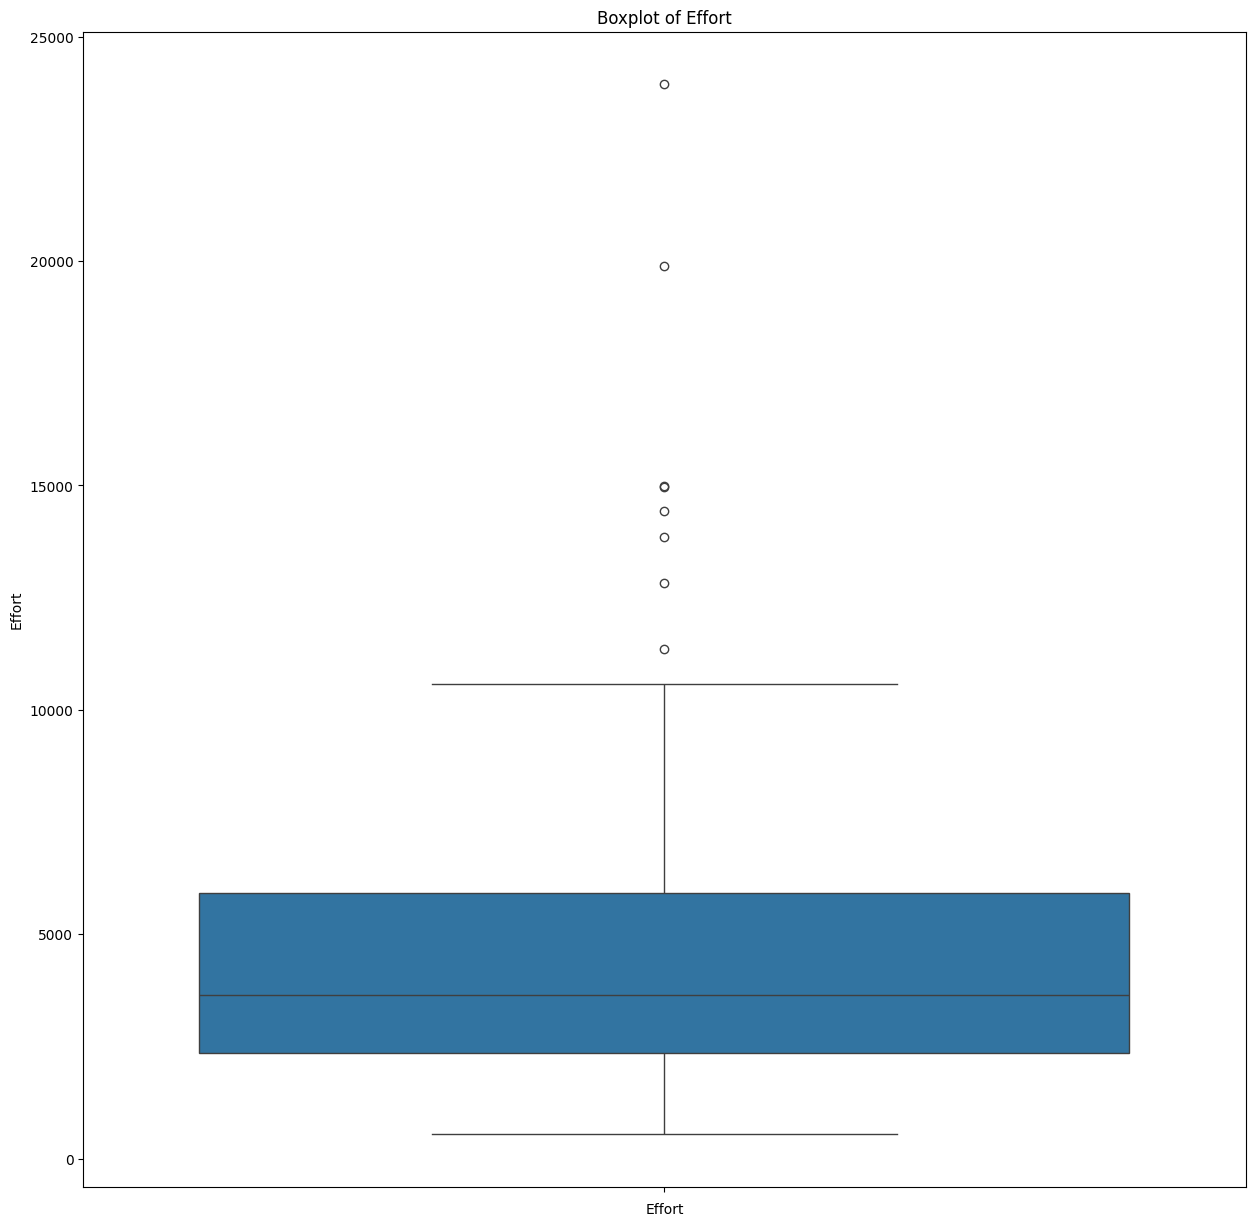

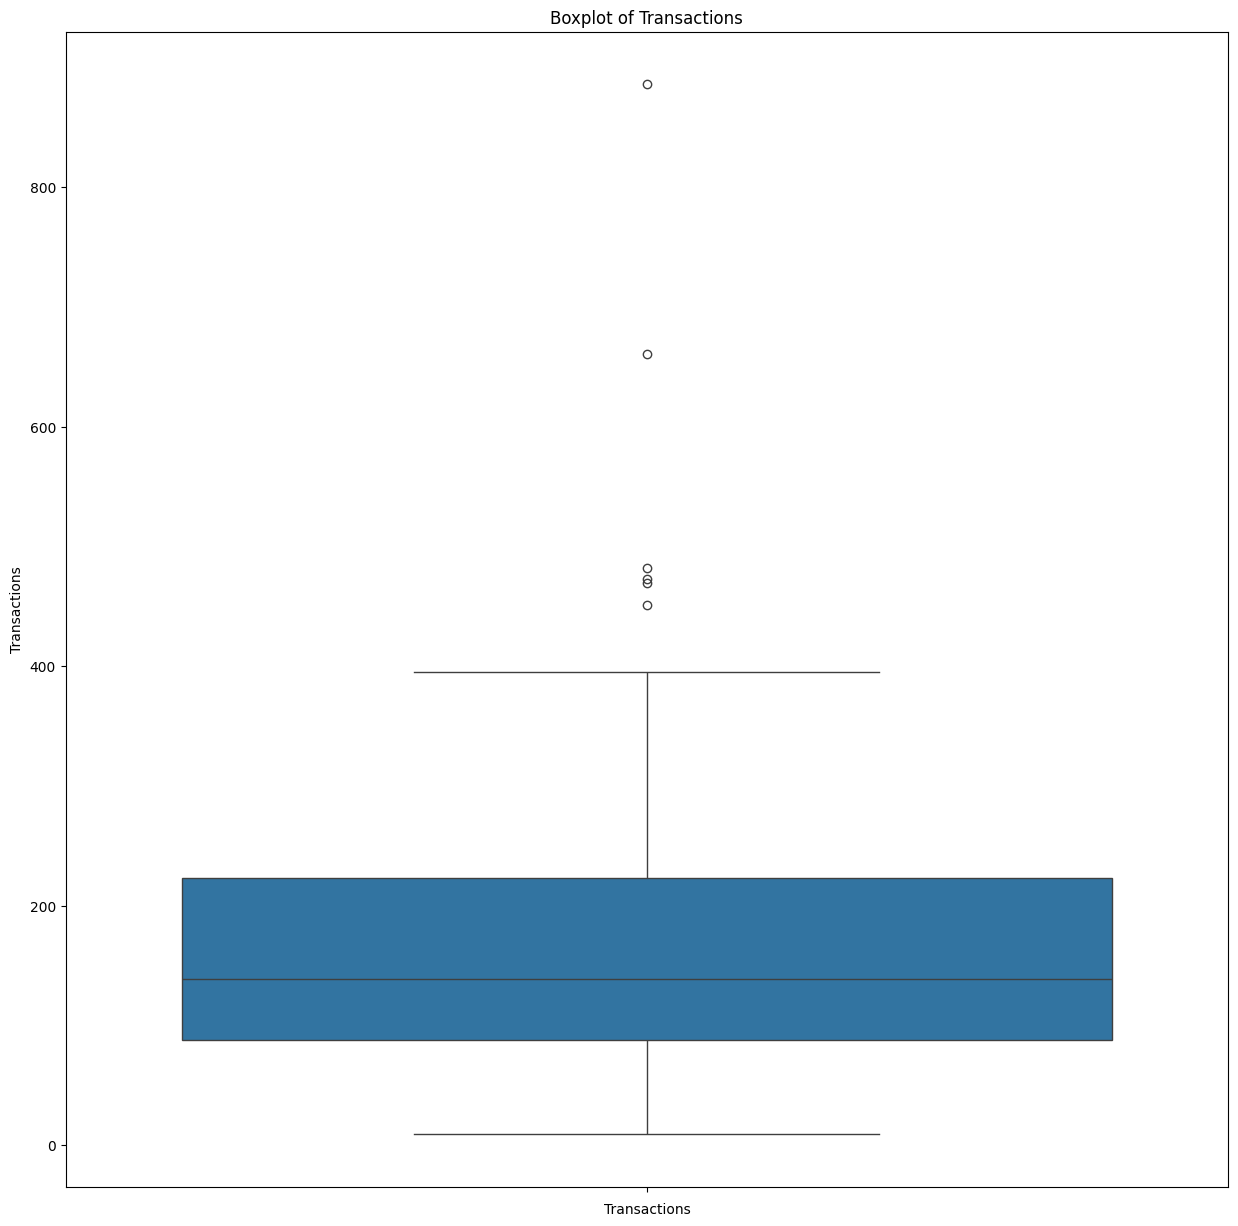

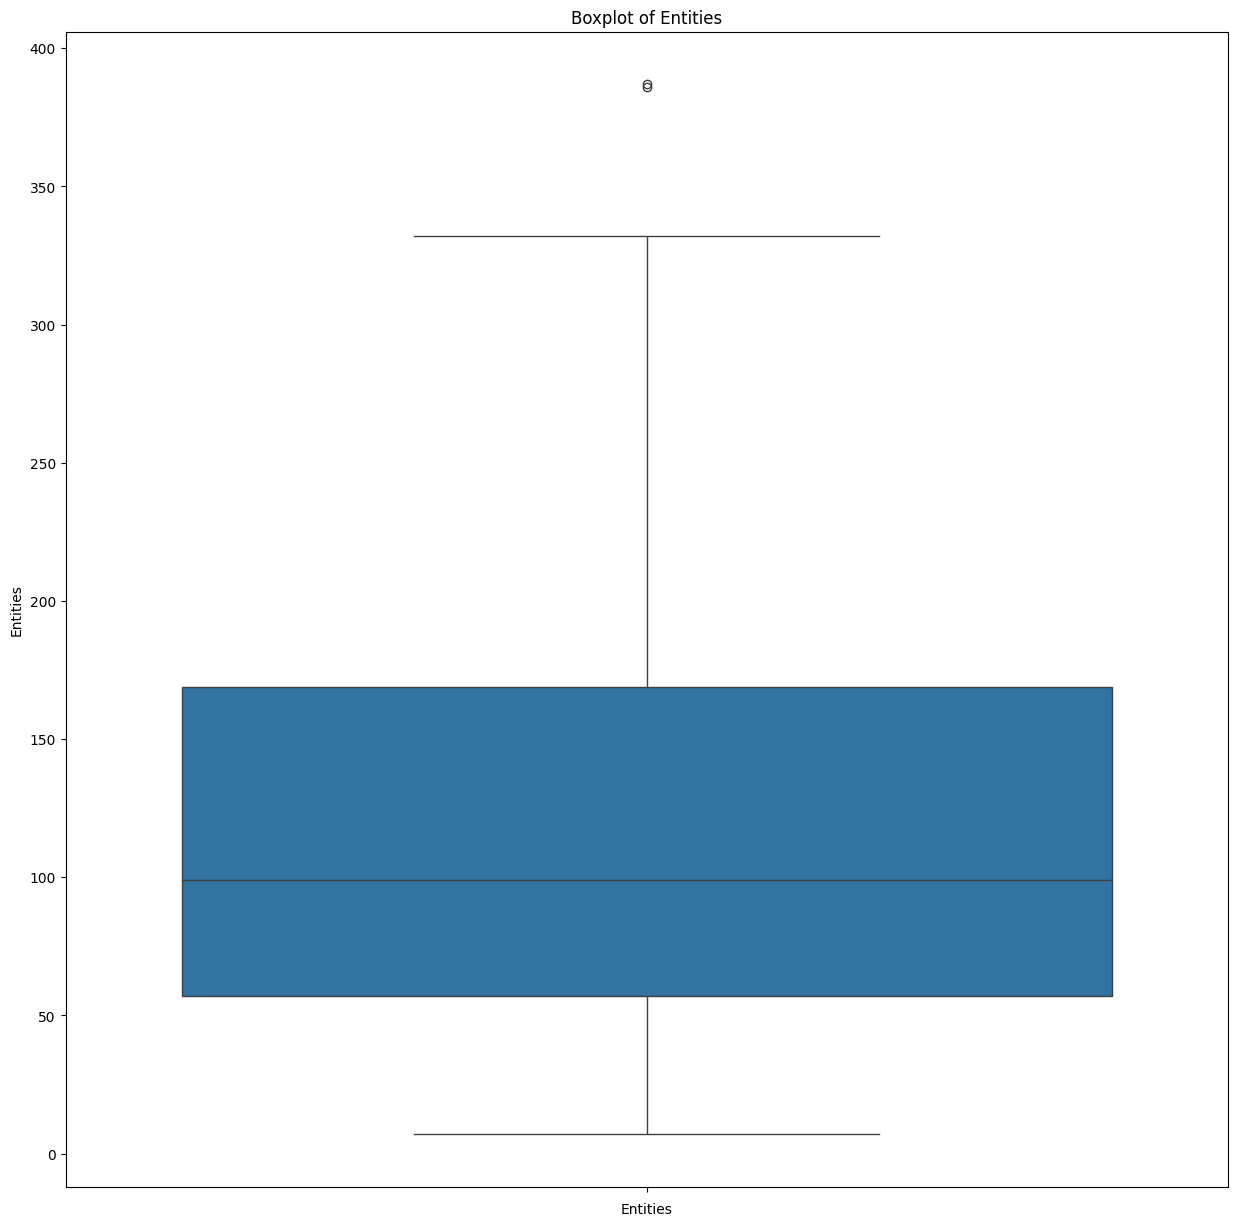

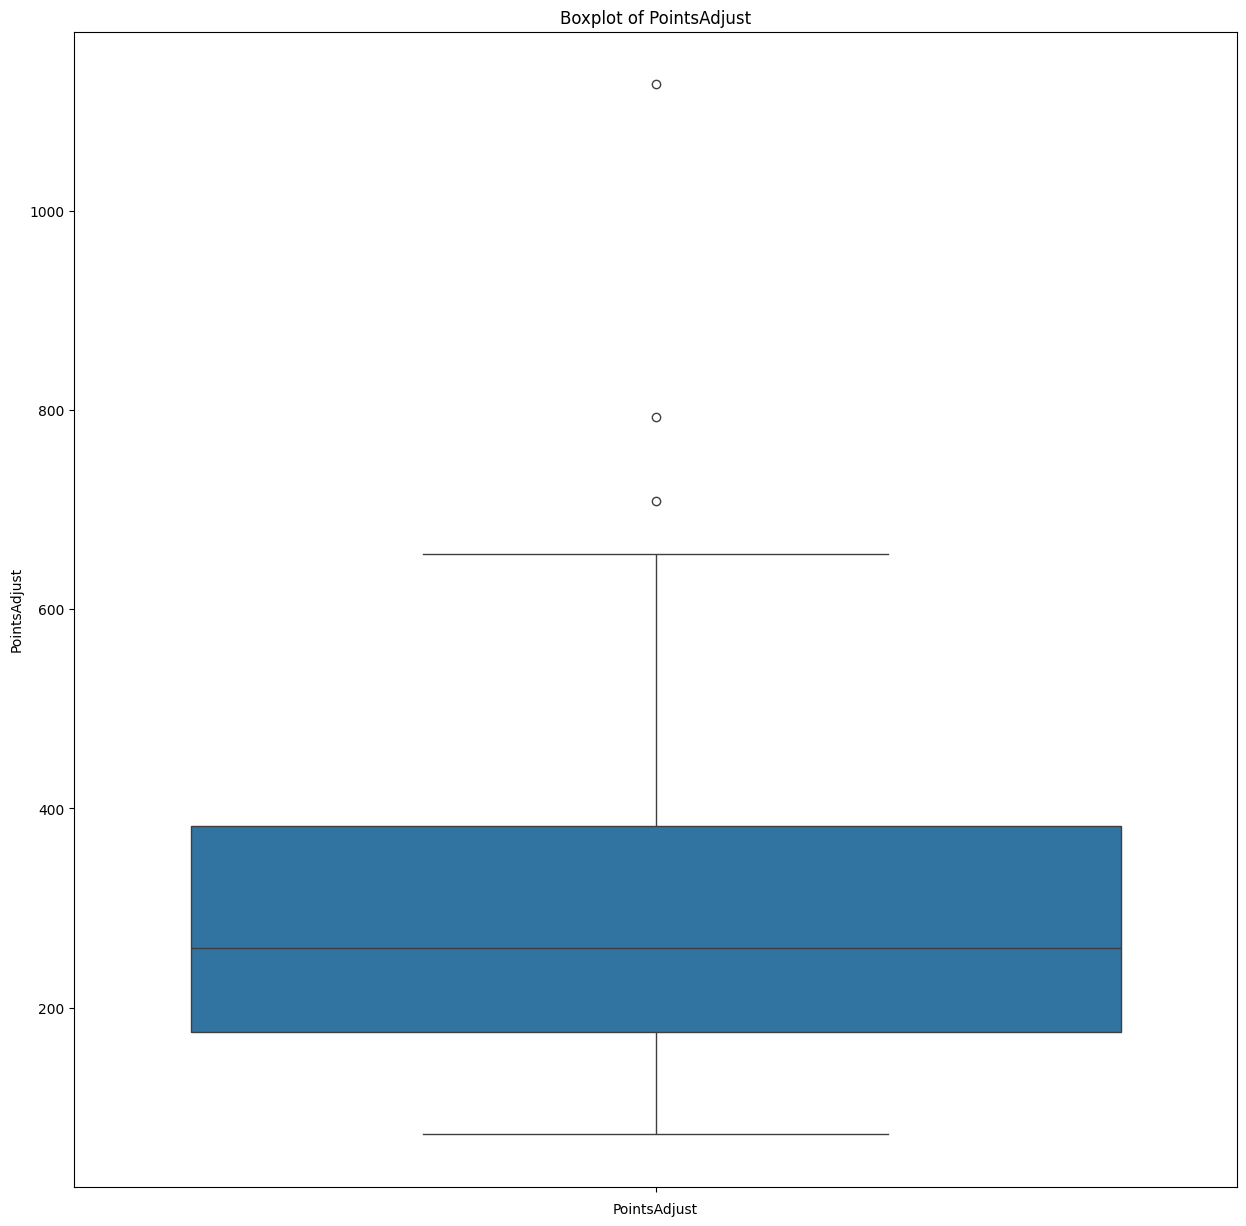

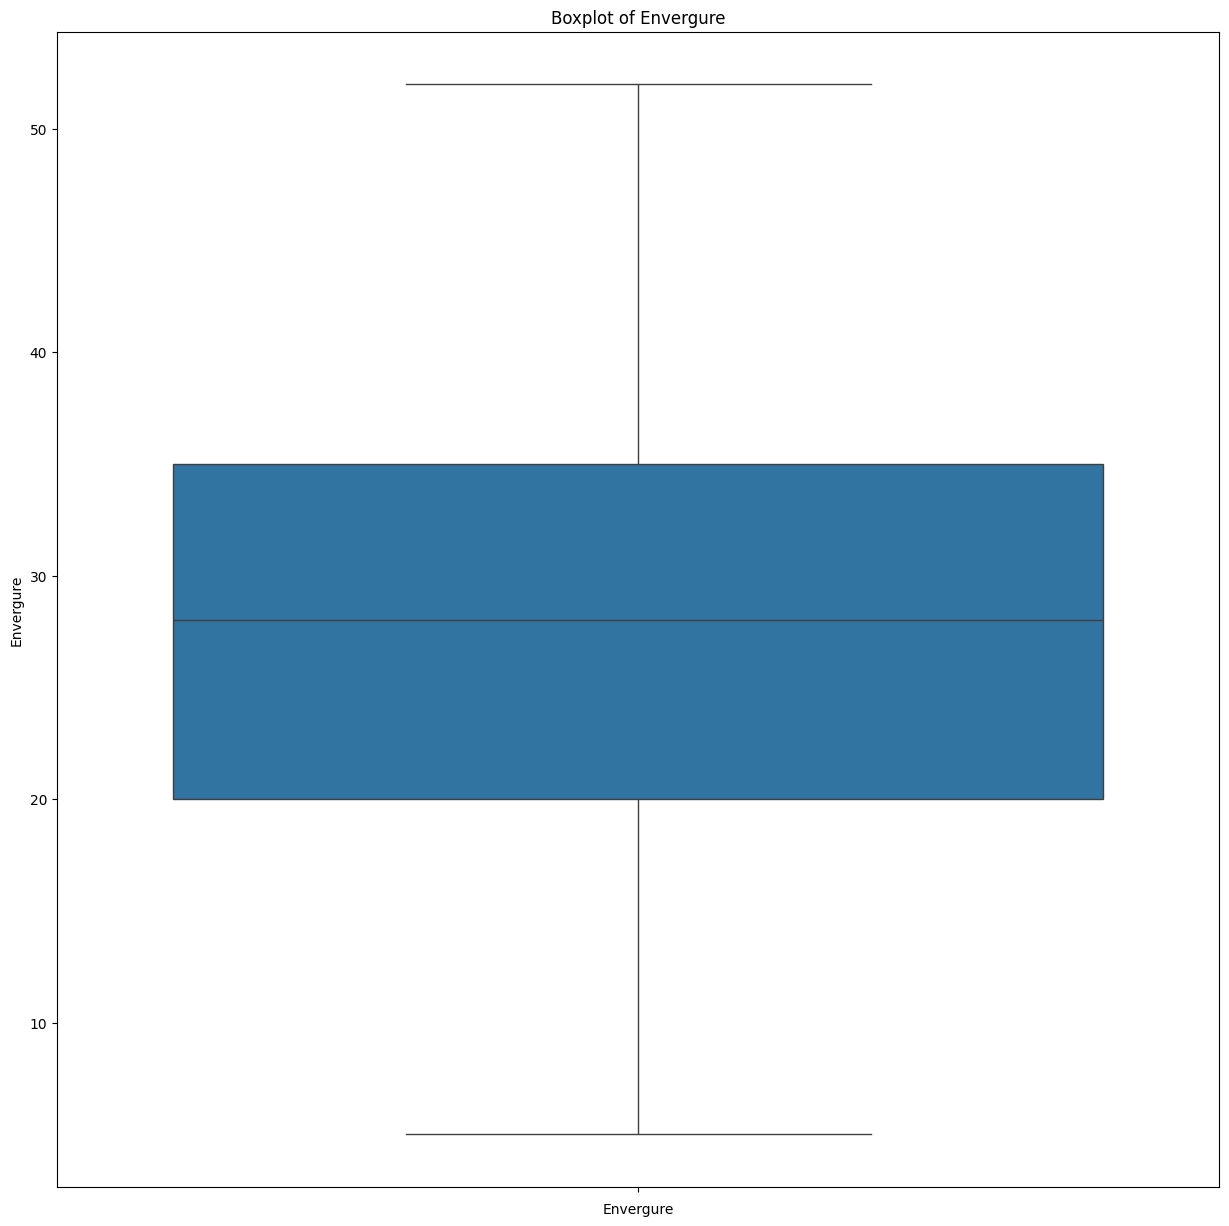

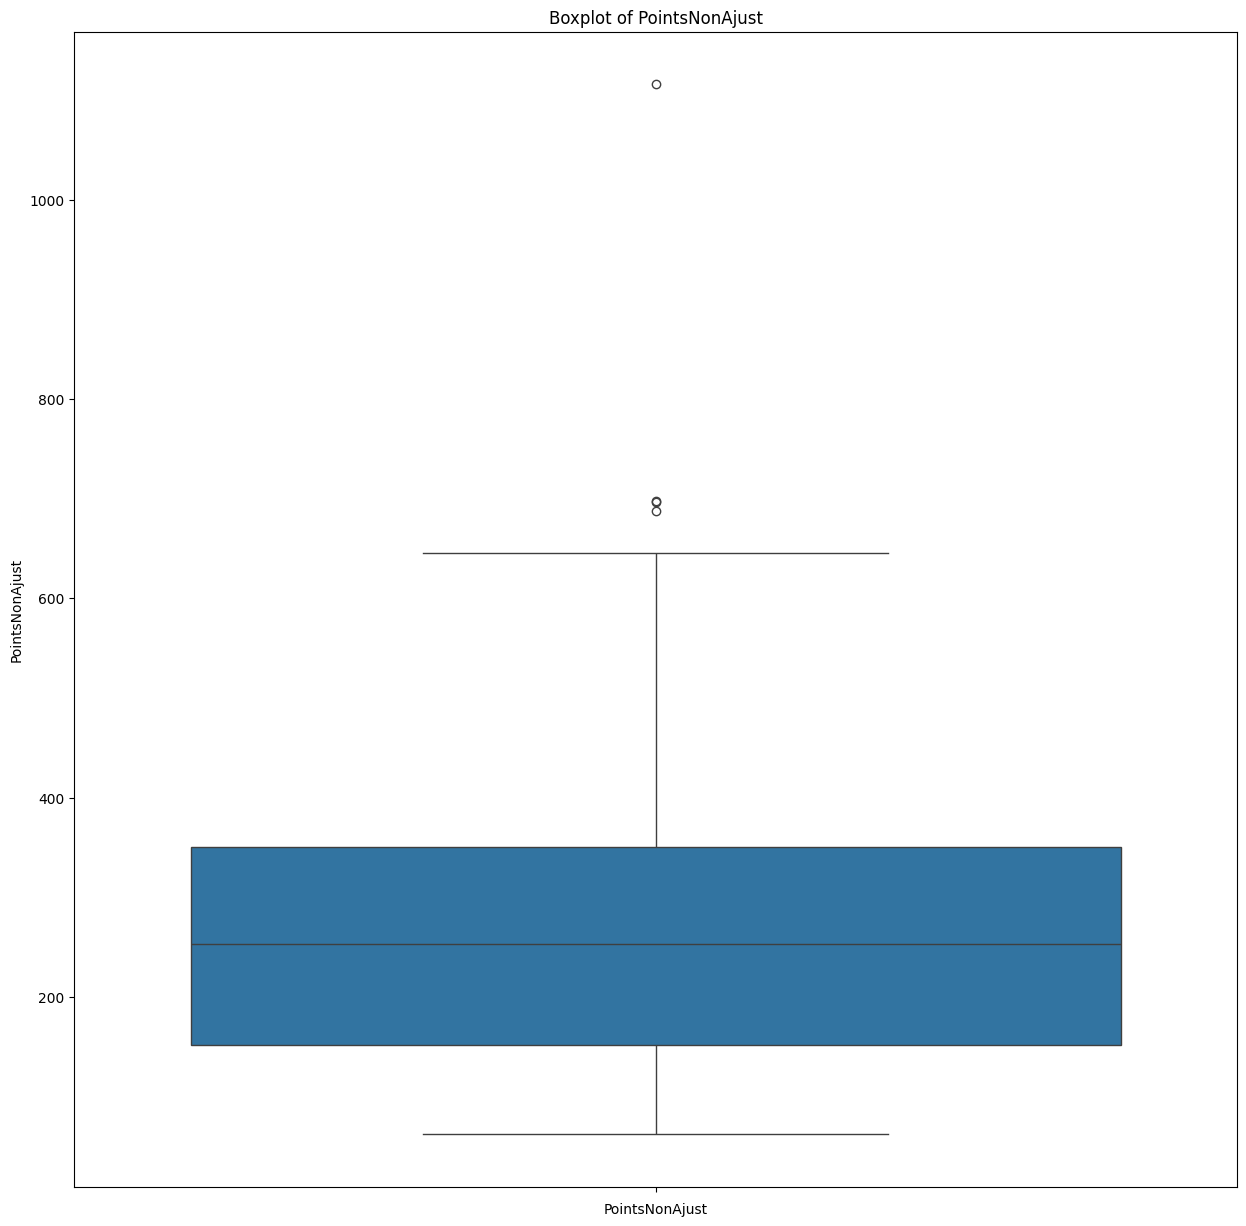

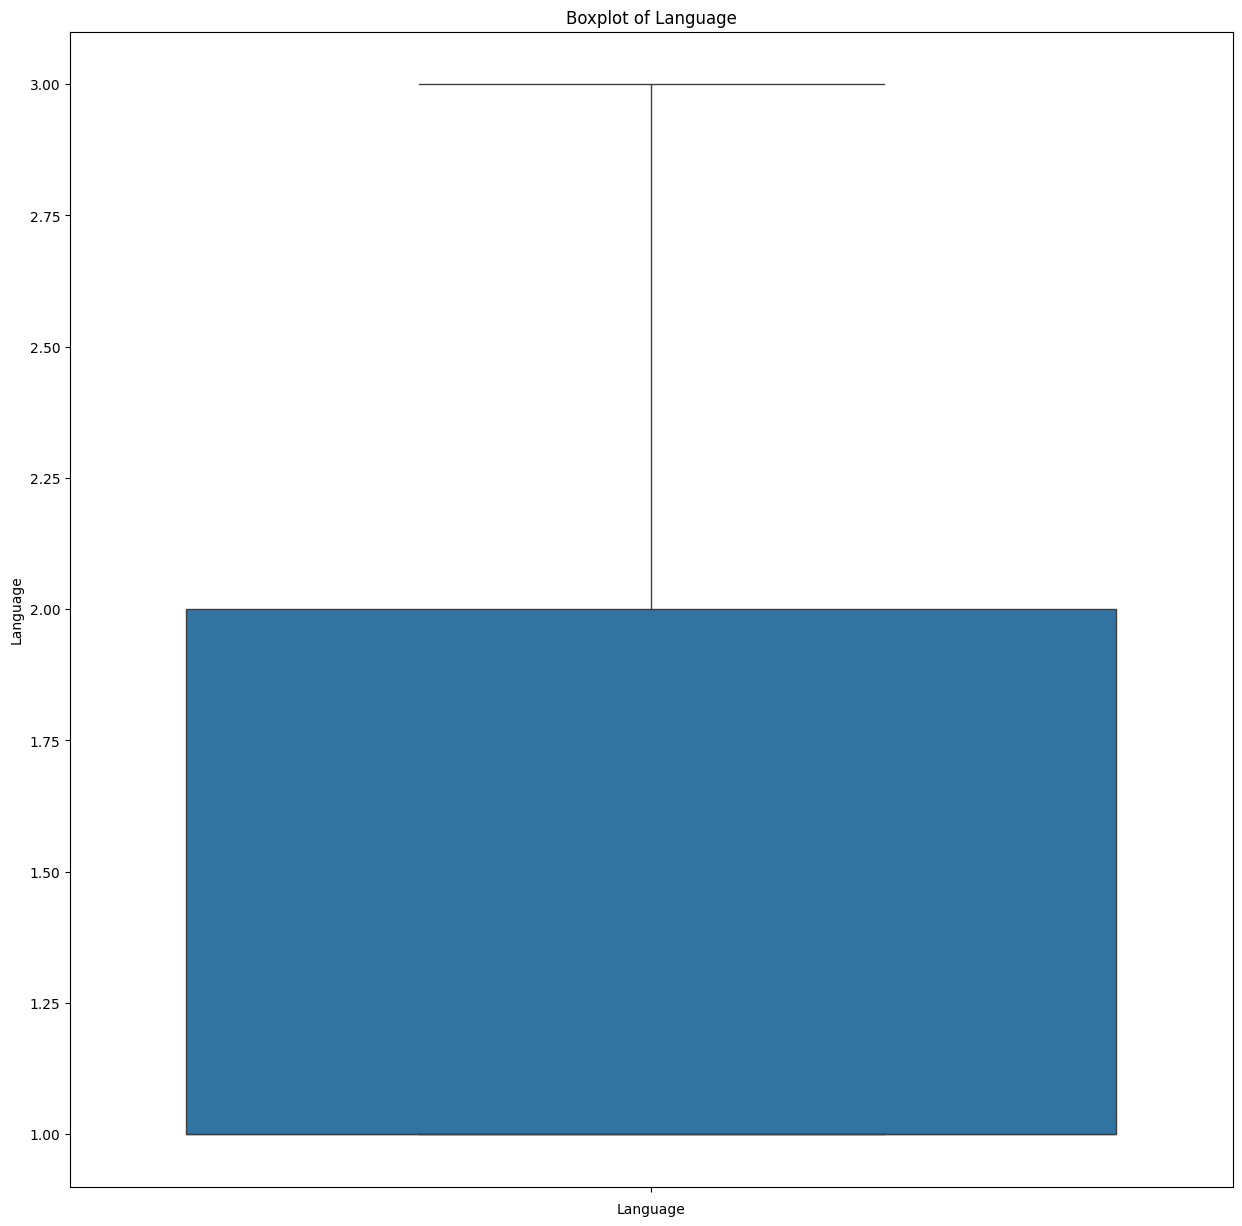

In [74]:
# Plotting boxplots for each numerical column
for col in columns:
    plt.figure(figsize=(15,15))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [75]:
from scipy.stats import trim_mean

trim_frac=0.10
for col in columns[1:]:
    print(f'Trimmed Mean for {col} : {trim_mean(df[col], proportiontocut=trim_frac)}')

Trimmed Mean for TeamExp : 2.3692307692307693
Trimmed Mean for ManagerExp : 2.7384615384615385
Trimmed Mean for YearEnd : 85.83076923076923
Trimmed Mean for Length : 10.615384615384615
Trimmed Mean for Effort : 4251.215384615384
Trimmed Mean for Transactions : 155.44615384615383
Trimmed Mean for Entities : 109.47692307692307
Trimmed Mean for PointsAdjust : 278.16923076923075
Trimmed Mean for Envergure : 27.8
Trimmed Mean for PointsNonAjust : 260.4153846153846
Trimmed Mean for Language : 1.4461538461538461


In [76]:
trim_frac = 0.1

trimmed_df = pd.DataFrame()

for col in df.columns:
    sorted_data = np.sort(df[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_column = np.full_like(df[col], np.nan)
    trimmed_column[lower_idx:upper_idx] = trimmed_data
    
    trimmed_df[col] = trimmed_column

print(trimmed_df)


                Project  TeamExp  ManagerExp              YearEnd  \
0  -9223372036854775808      NaN         NaN -9223372036854775808   
1  -9223372036854775808      NaN         NaN -9223372036854775808   
2  -9223372036854775808      NaN         NaN -9223372036854775808   
3  -9223372036854775808      NaN         NaN -9223372036854775808   
4  -9223372036854775808      NaN         NaN -9223372036854775808   
..                  ...      ...         ...                  ...   
76 -9223372036854775808      NaN         NaN -9223372036854775808   
77 -9223372036854775808      NaN         NaN -9223372036854775808   
78 -9223372036854775808      NaN         NaN -9223372036854775808   
79 -9223372036854775808      NaN         NaN -9223372036854775808   
80 -9223372036854775808      NaN         NaN -9223372036854775808   

                 Length               Effort         Transactions  \
0  -9223372036854775808 -9223372036854775808 -9223372036854775808   
1  -9223372036854775808 -92233720

c:\Python310\lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Python310\lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Python310\lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Python310\lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Python310\lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Python310\lib\site-packages\numpy\_core\numeric.py:452: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
c:\Python310\lib

In [77]:
trimmed_median_dict = {}
trimmed_std_dict = {}

for col in df.columns:
    sorted_data = np.sort(df[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_median = np.median(trimmed_data)
    trimmed_median_dict[col] = trimmed_median
    
    trimmed_std = np.std(trimmed_data, ddof=1) 
    trimmed_std_dict[col] = trimmed_std

trimmed_median_df = pd.DataFrame(list(trimmed_median_dict.items()), columns=['Column', 'Trimmed Median'])
trimmed_std_df = pd.DataFrame(list(trimmed_std_dict.items()), columns=['Column', 'Trimmed Std Deviation'])

print("Trimmed Medians:")
print(trimmed_median_df[1:])

print("\nTrimmed Standard Deviations:")
print(trimmed_std_df[1:])


Trimmed Medians:
            Column  Trimmed Median
1          TeamExp             2.0
2       ManagerExp             3.0
3          YearEnd            86.0
4           Length            10.0
5           Effort          3636.5
6     Transactions           138.0
7         Entities            98.0
8     PointsAdjust           259.5
9        Envergure            28.0
10  PointsNonAjust           250.0
11        Language             1.0

Trimmed Standard Deviations:
            Column  Trimmed Std Deviation
1          TeamExp               1.129949
2       ManagerExp               1.161126
3          YearEnd               0.753300
4           Length               3.887014
5           Effort            2155.469348
6     Transactions              67.900655
7         Entities              50.897342
8     PointsAdjust              99.165041
9        Envergure               7.256343
10  PointsNonAjust             105.451241
11        Language               0.528691


COCOMO81


In [78]:
import arff

with open('./cocomo811.arff') as f:
    dataset=arff.load(f)

cocomo = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

cocomo.head()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.0,1.06,1.15,1.07,1.19,1.13,1.17,1.1,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.0,1.06,1.00,1.07,1.00,0.91,1.00,0.9,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.0,1.00,0.87,0.94,0.86,0.82,0.86,0.9,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.0,1.00,0.87,1.00,1.19,0.91,1.42,1.0,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.0,1.00,0.87,1.00,1.00,1.00,0.86,0.9,0.95,1.24,1.00,1.00,16.0,33.0


In [79]:
# Missing values and data types
cocomo.info()
cocomo.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rely    63 non-null     float64
 1   data    63 non-null     float64
 2   cplx    63 non-null     float64
 3   time    63 non-null     float64
 4   stor    63 non-null     float64
 5   virt    63 non-null     float64
 6   turn    63 non-null     float64
 7   acap    63 non-null     float64
 8   aexp    63 non-null     float64
 9   pcap    63 non-null     float64
 10  vexp    63 non-null     float64
 11  lexp    63 non-null     float64
 12  modp    63 non-null     float64
 13  tool    63 non-null     float64
 14  sced    63 non-null     float64
 15  loc     63 non-null     float64
 16  actual  63 non-null     float64
dtypes: float64(17)
memory usage: 8.5 KB


rely      0
data      0
cplx      0
time      0
stor      0
virt      0
turn      0
acap      0
aexp      0
pcap      0
vexp      0
lexp      0
modp      0
tool      0
sced      0
loc       0
actual    0
dtype: int64

In [80]:
#Basic stats for dataset
#mean
# percentile for p=0.25 & 0.75
# third quartile/median
cocomo.describe()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
count,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.036349,1.003968,1.091429,1.113810,1.14381,1.008413,0.971746,0.905238,0.948571,0.93746,1.005238,1.001429,1.004127,1.016984,1.048889,77.209841,683.320635
std,0.193477,0.073431,0.202563,0.161639,0.17942,0.120593,0.080973,0.151507,0.119243,0.16651,0.093375,0.051988,0.130935,0.085735,0.075586,168.509374,1821.582348
min,0.750000,0.940000,0.700000,1.000000,1.00000,0.870000,0.870000,0.710000,0.820000,0.70000,0.900000,0.950000,0.820000,0.830000,1.000000,1.980000,5.900000
25%,0.880000,0.940000,1.000000,1.000000,1.00000,0.870000,0.870000,0.860000,0.820000,0.86000,0.900000,0.950000,0.910000,1.000000,1.000000,8.650000,40.500000
50%,1.000000,1.000000,1.070000,1.060000,1.06000,1.000000,1.000000,0.860000,1.000000,0.86000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,98.000000
75%,1.150000,1.040000,1.300000,1.110000,1.21000,1.150000,1.000000,1.000000,1.000000,1.00000,1.100000,1.000000,1.100000,1.100000,1.080000,60.000000,438.000000
max,1.400000,1.160000,1.650000,1.660000,1.56000,1.300000,1.150000,1.460000,1.290000,1.42000,1.210000,1.140000,1.240000,1.240000,1.230000,1150.000000,11400.000000


In [81]:
# Duplicate rows
cocomo.duplicated().sum()

np.int64(0)

<Axes: >

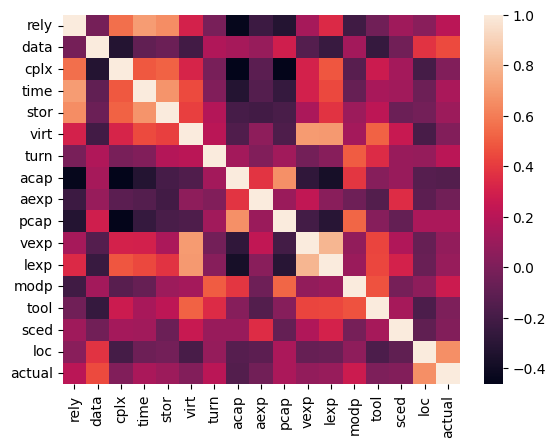

In [82]:
# Adequacy of data using heatmap
sns.heatmap(cocomo.corr())

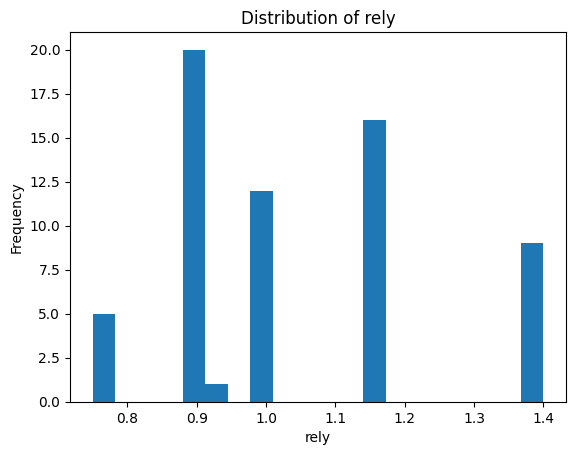

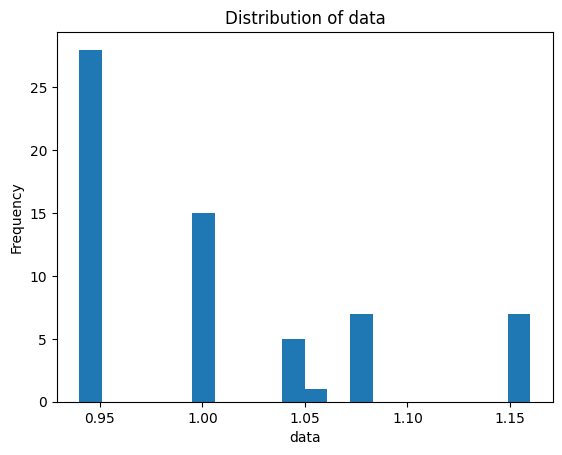

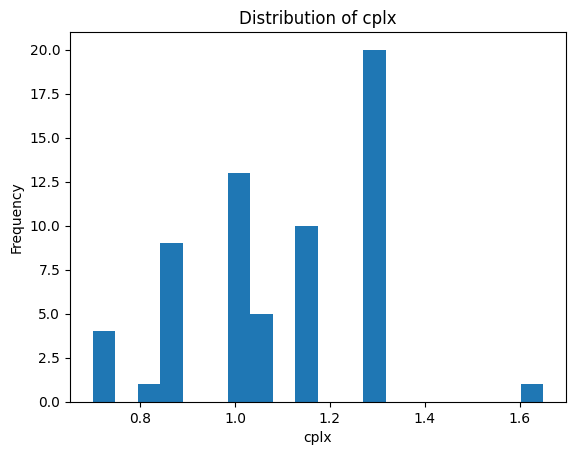

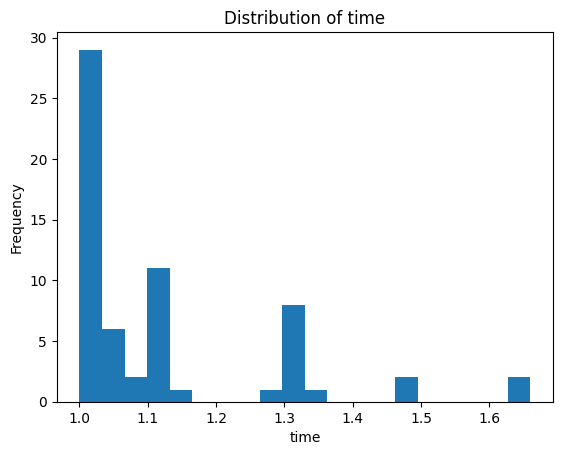

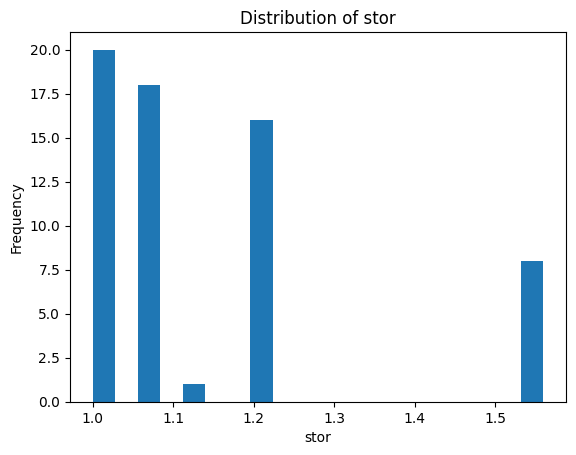

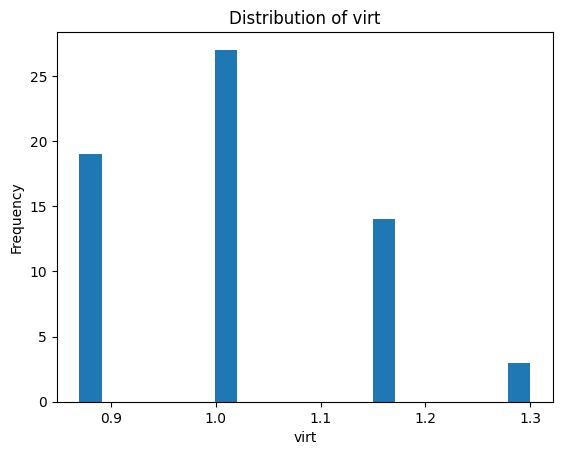

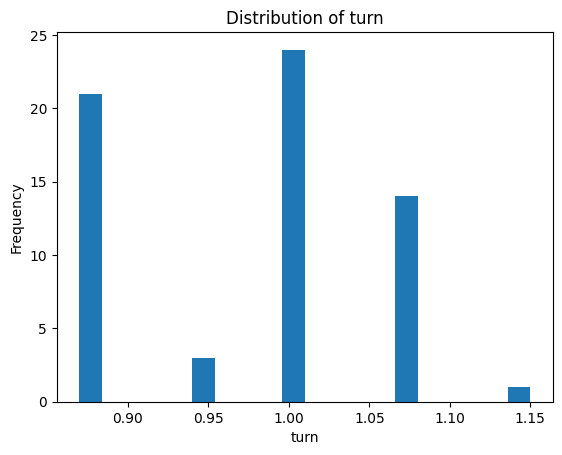

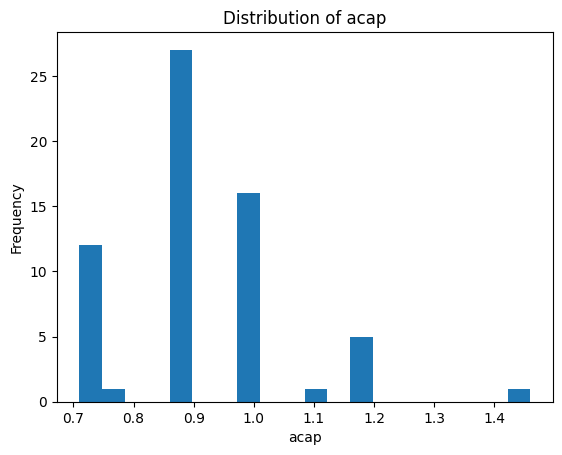

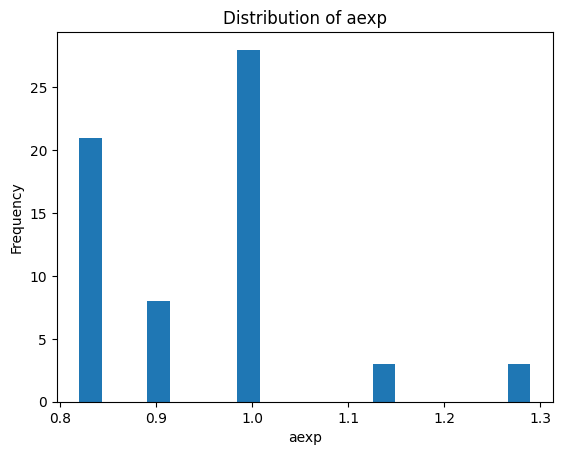

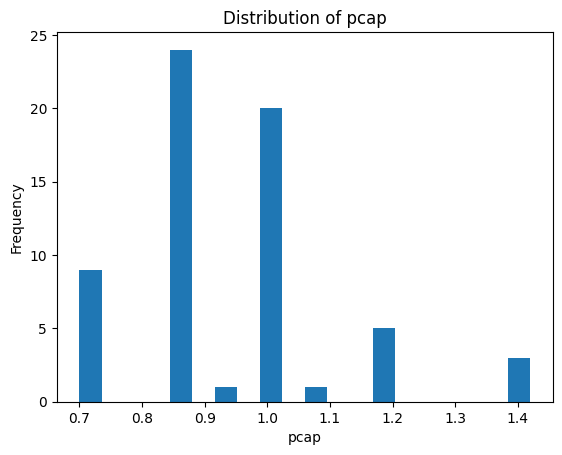

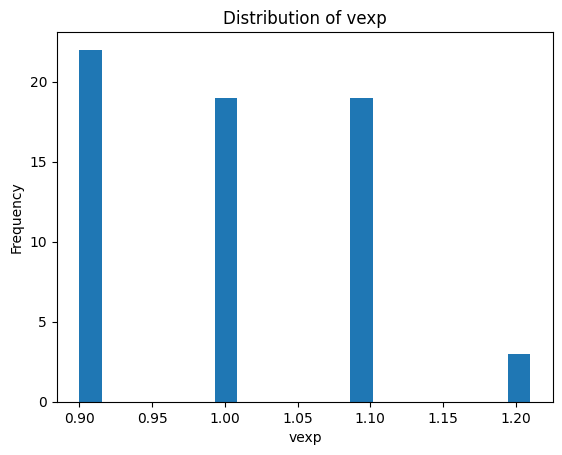

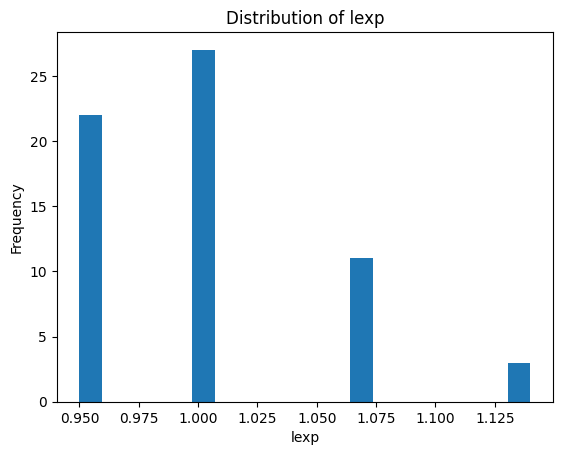

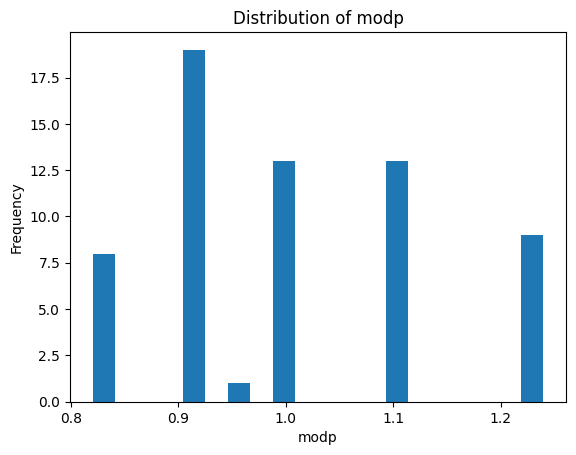

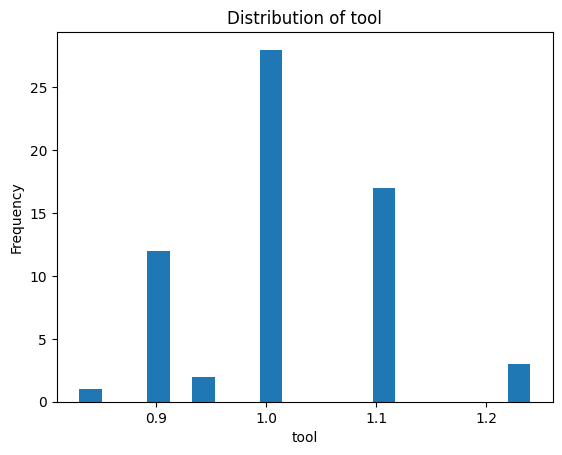

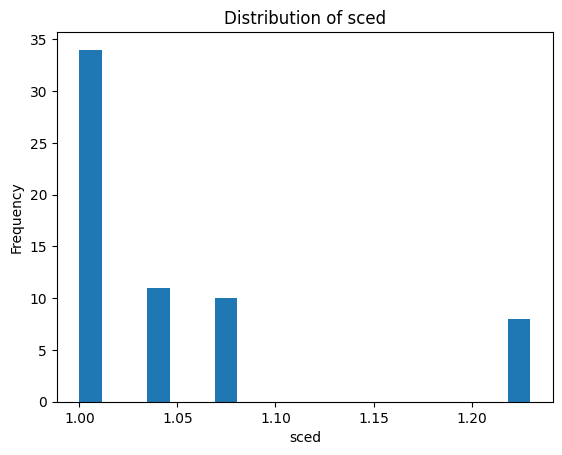

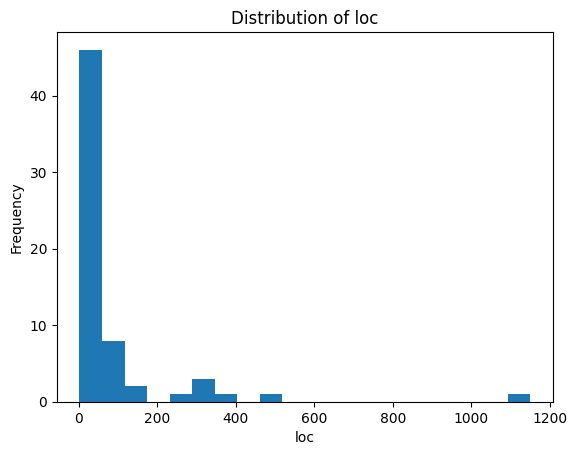

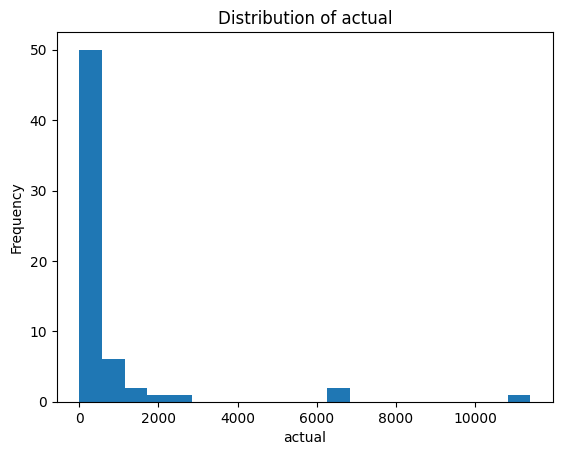

In [83]:
# Checking for class imbalance
for col in cocomo.columns:
    cocomo[col].plot(kind='hist', bins=20, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

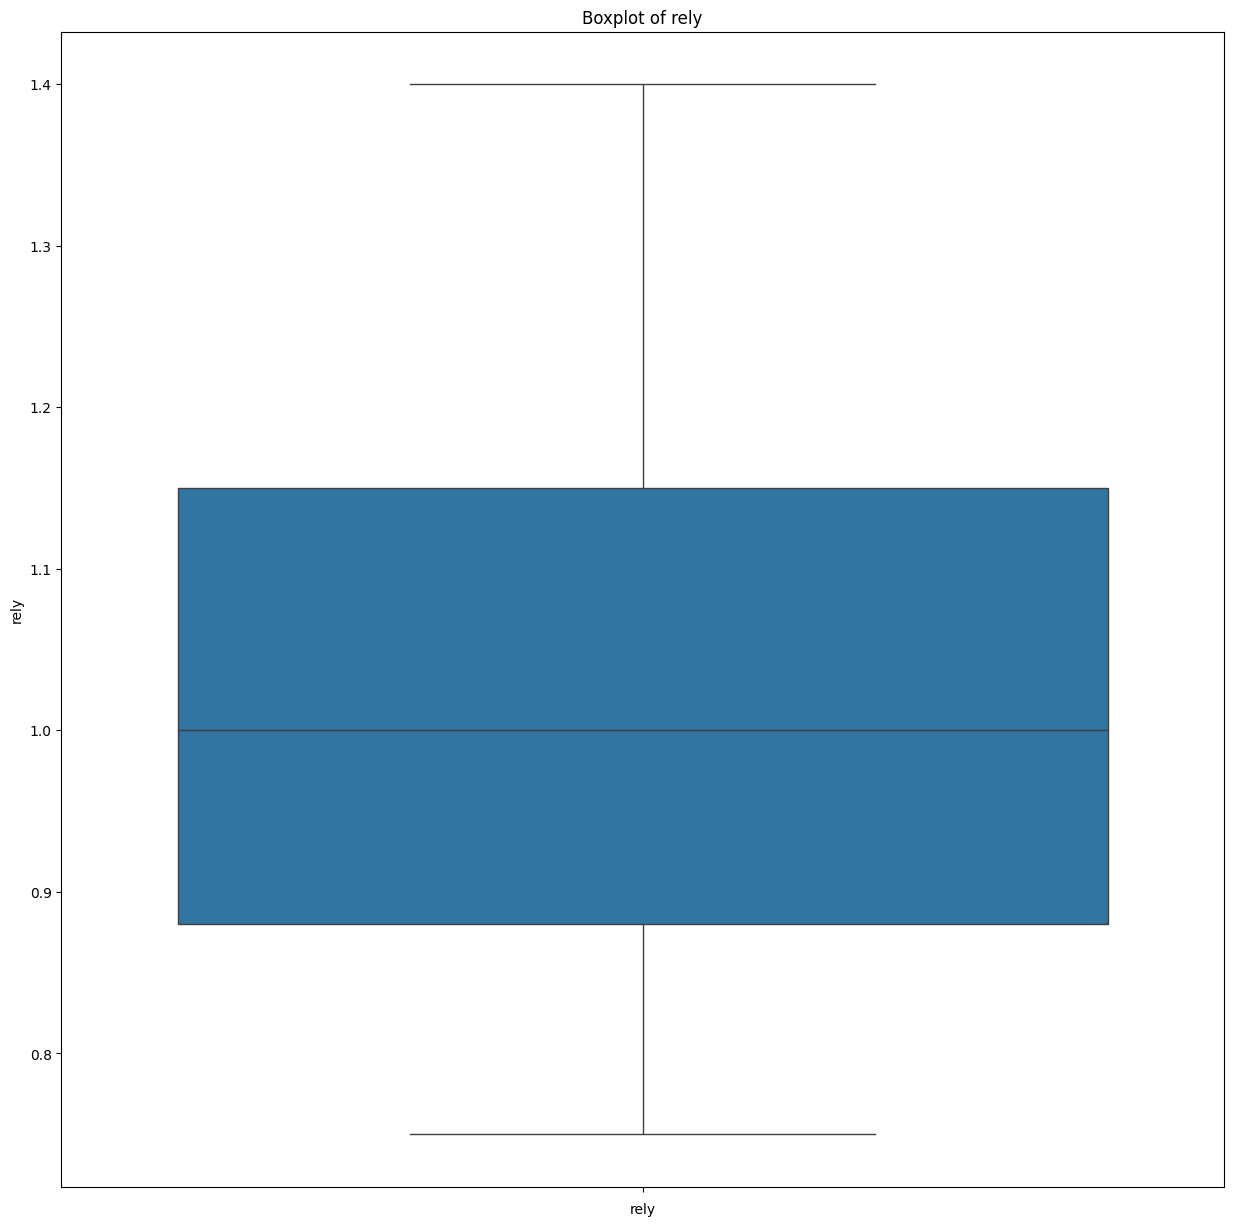

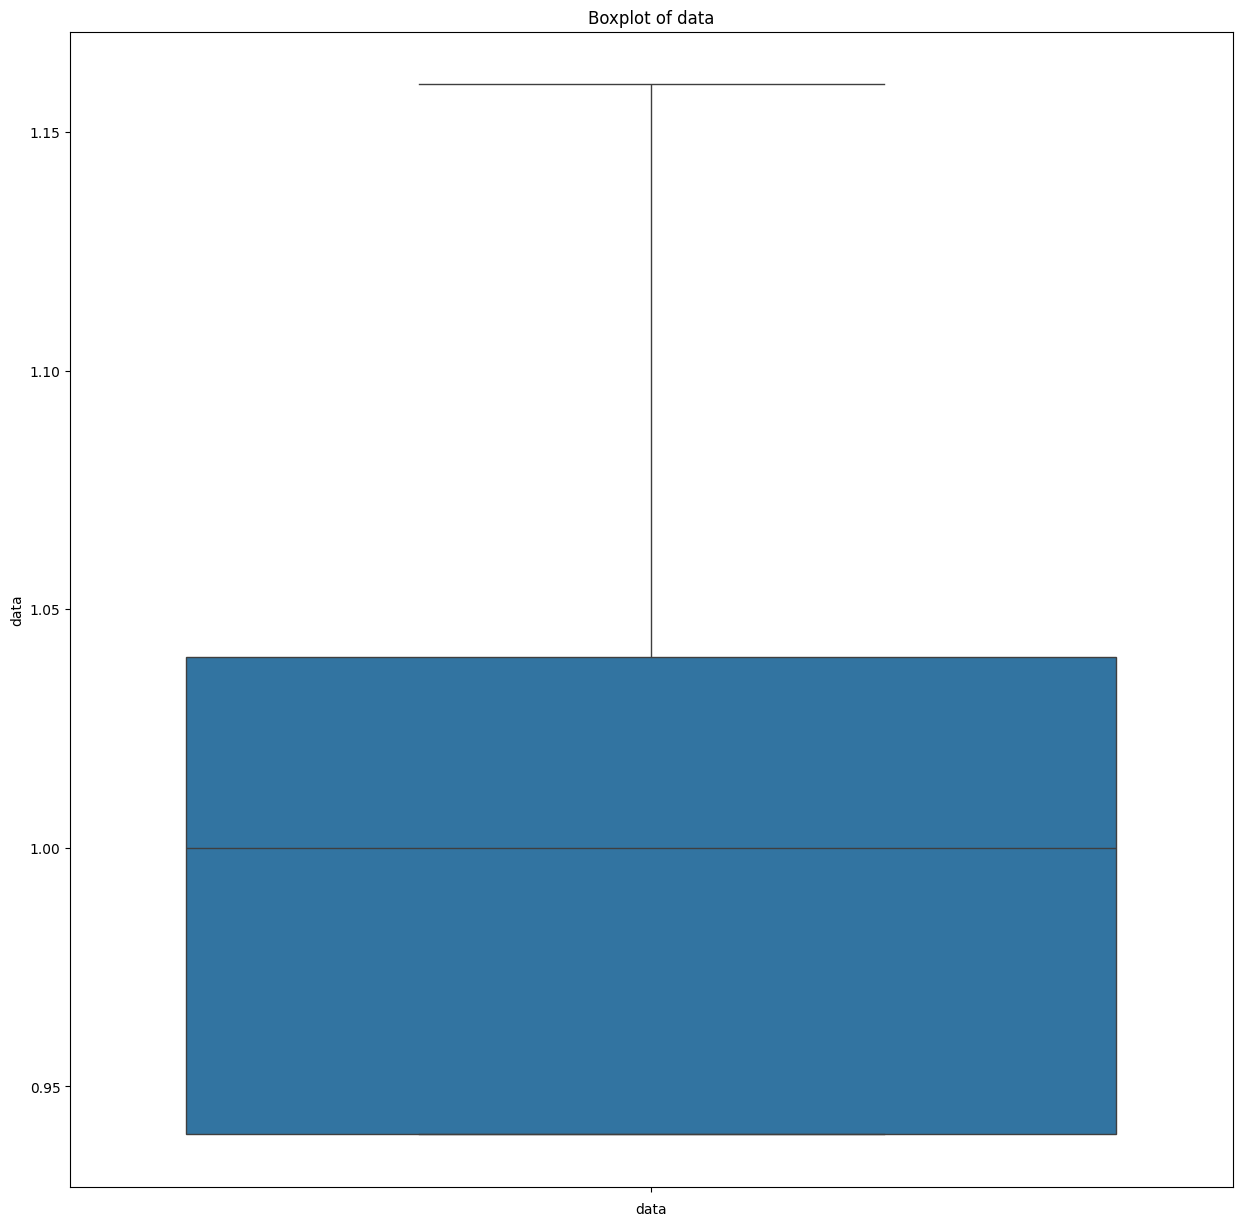

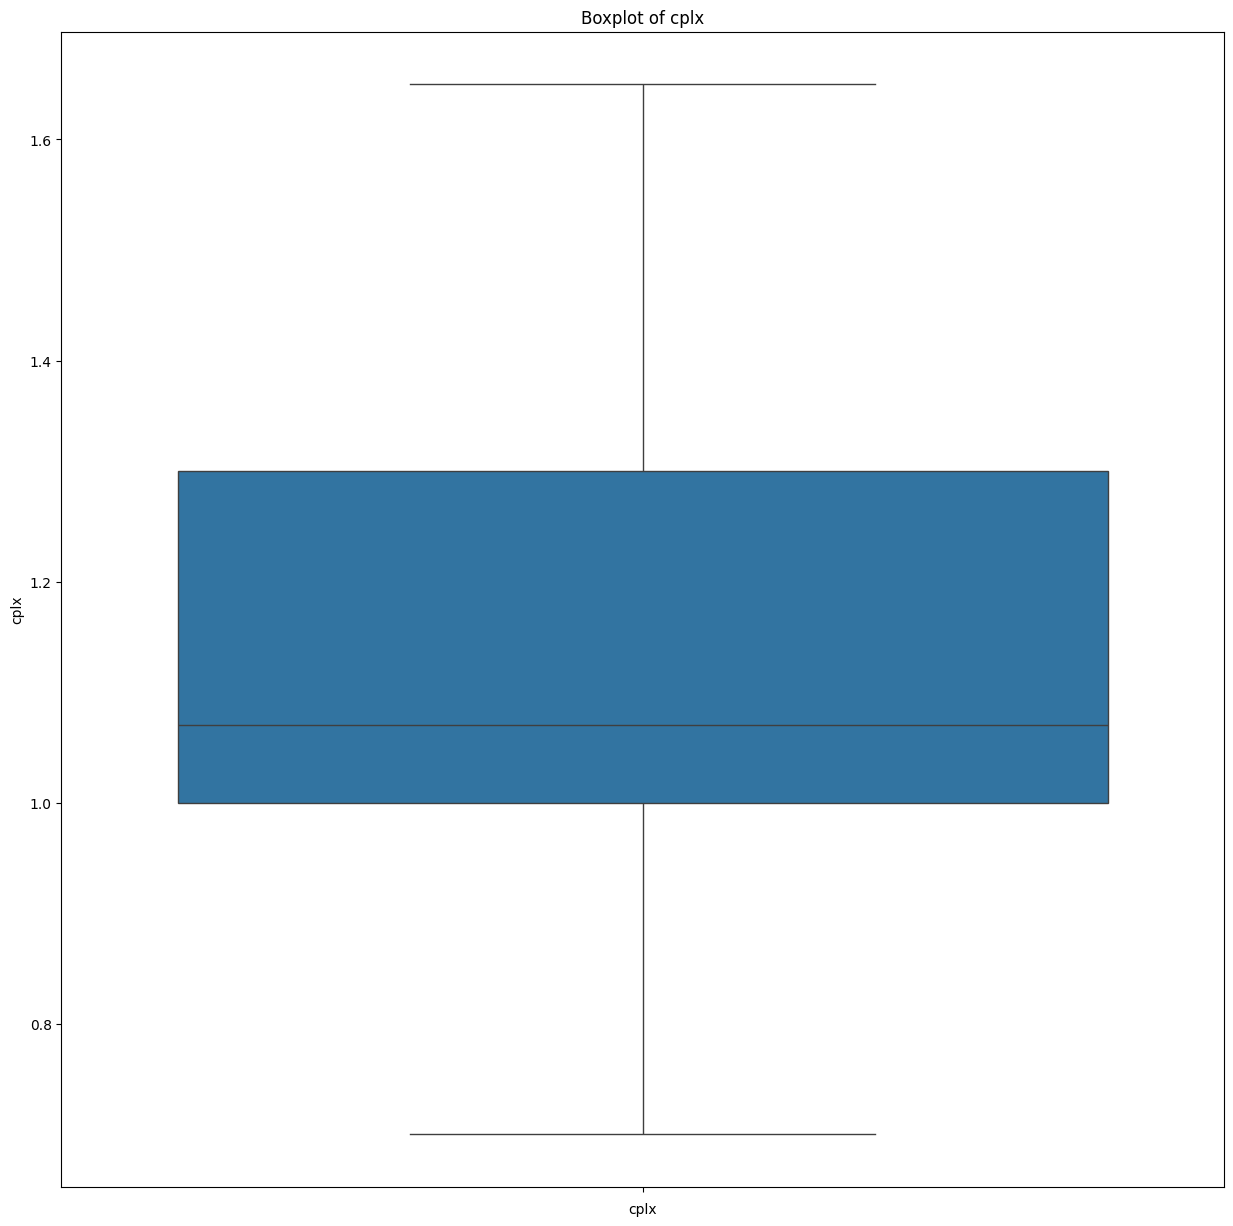

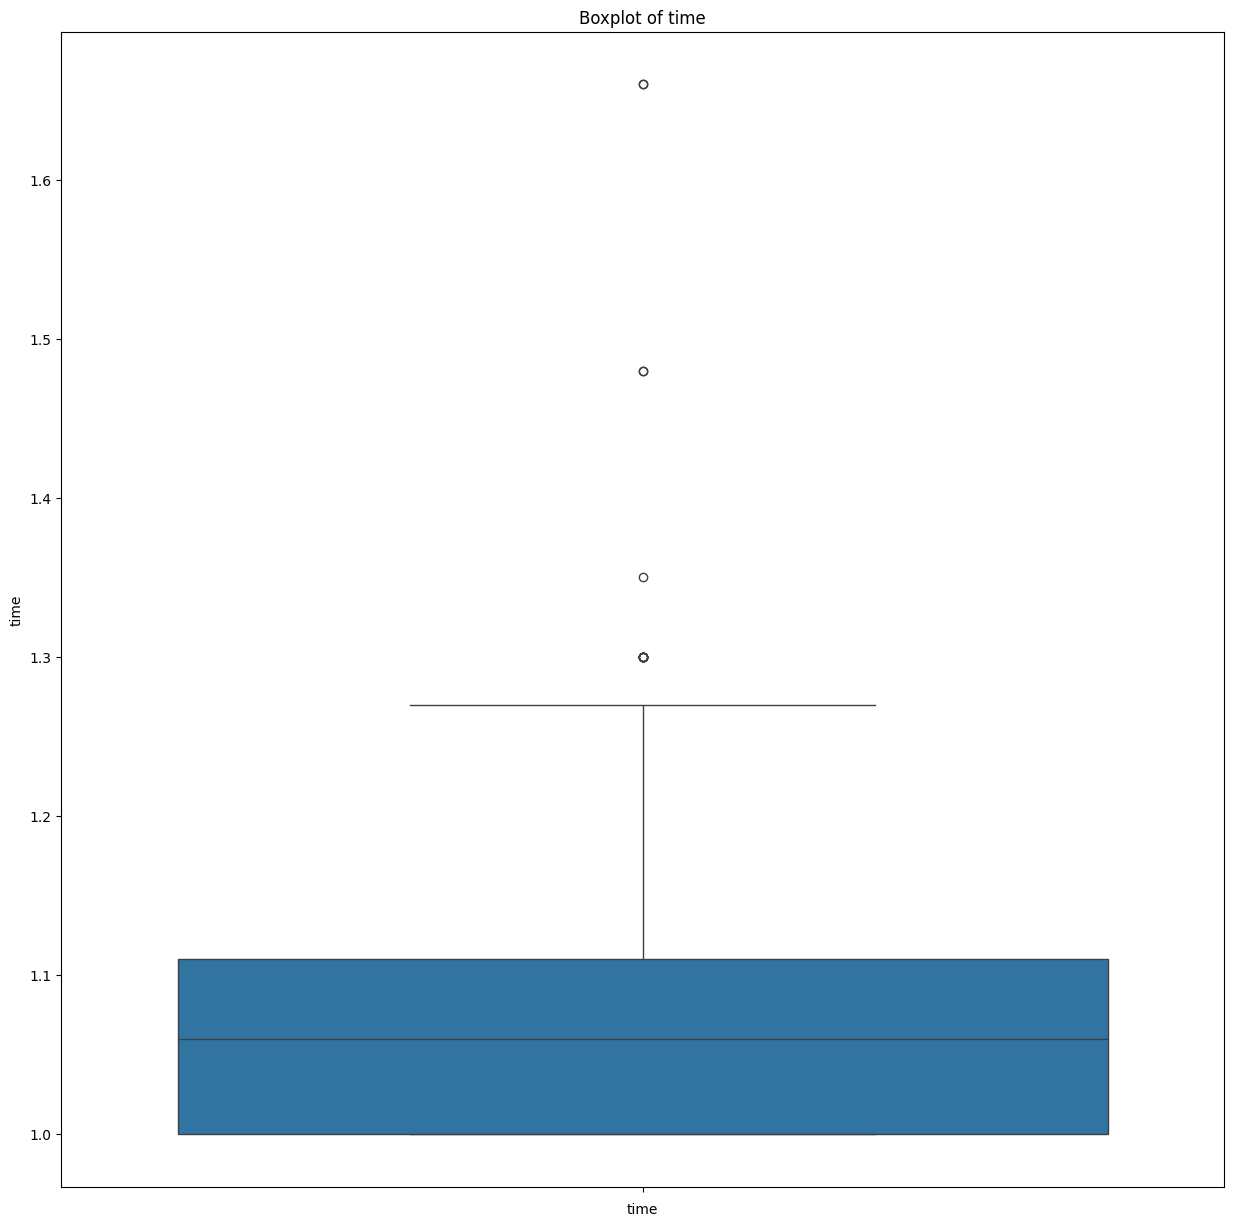

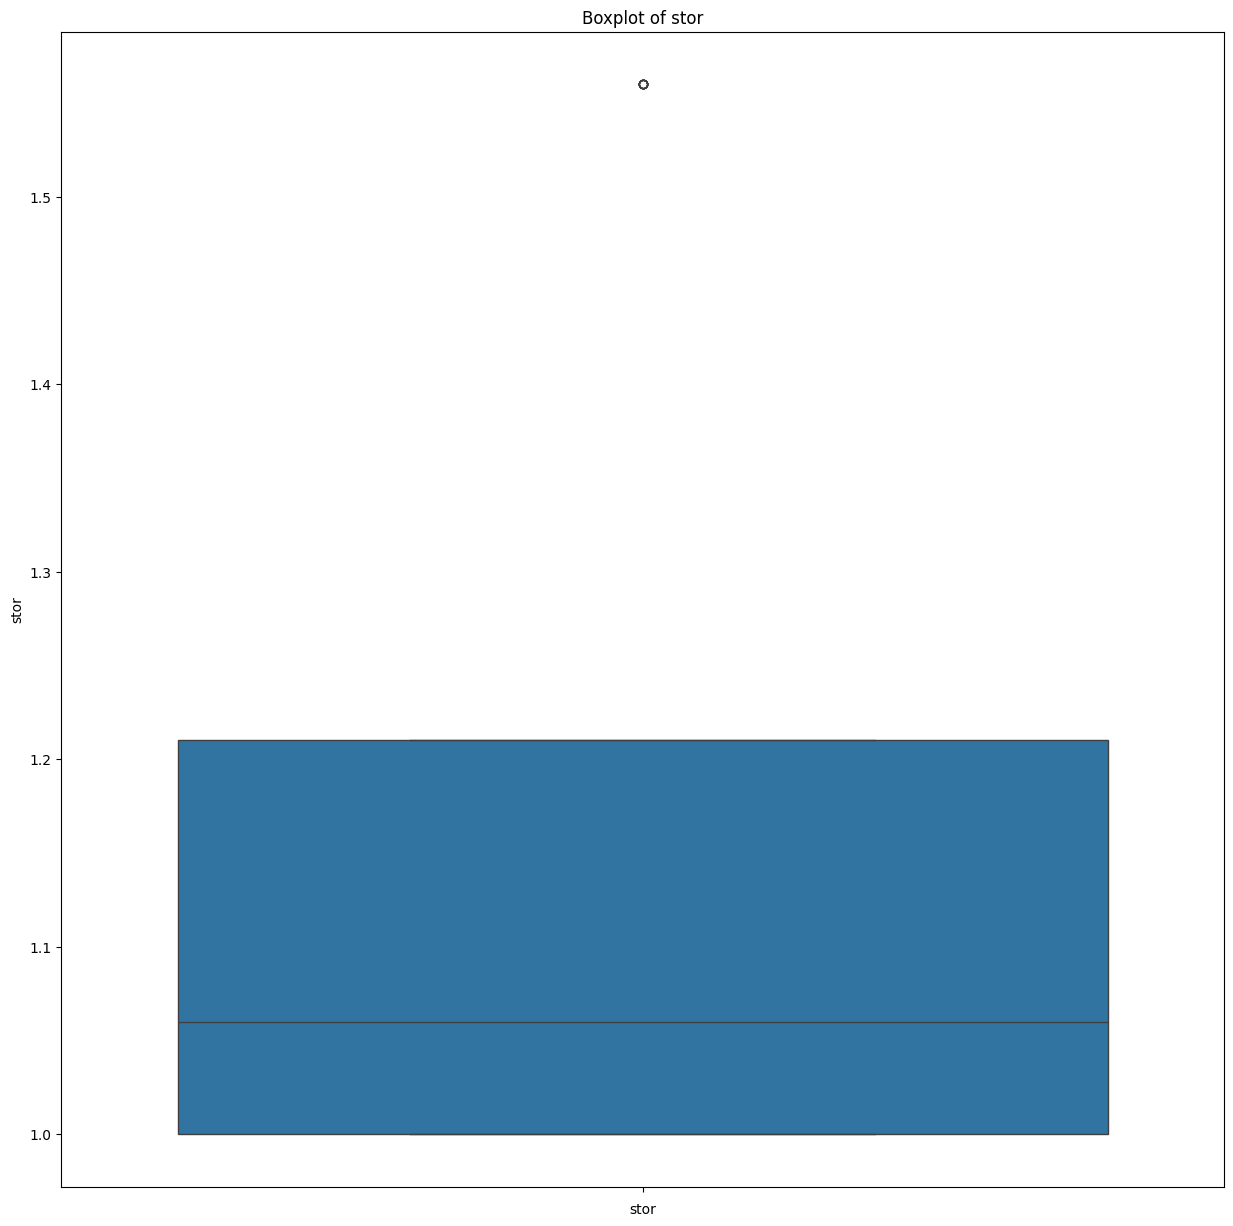

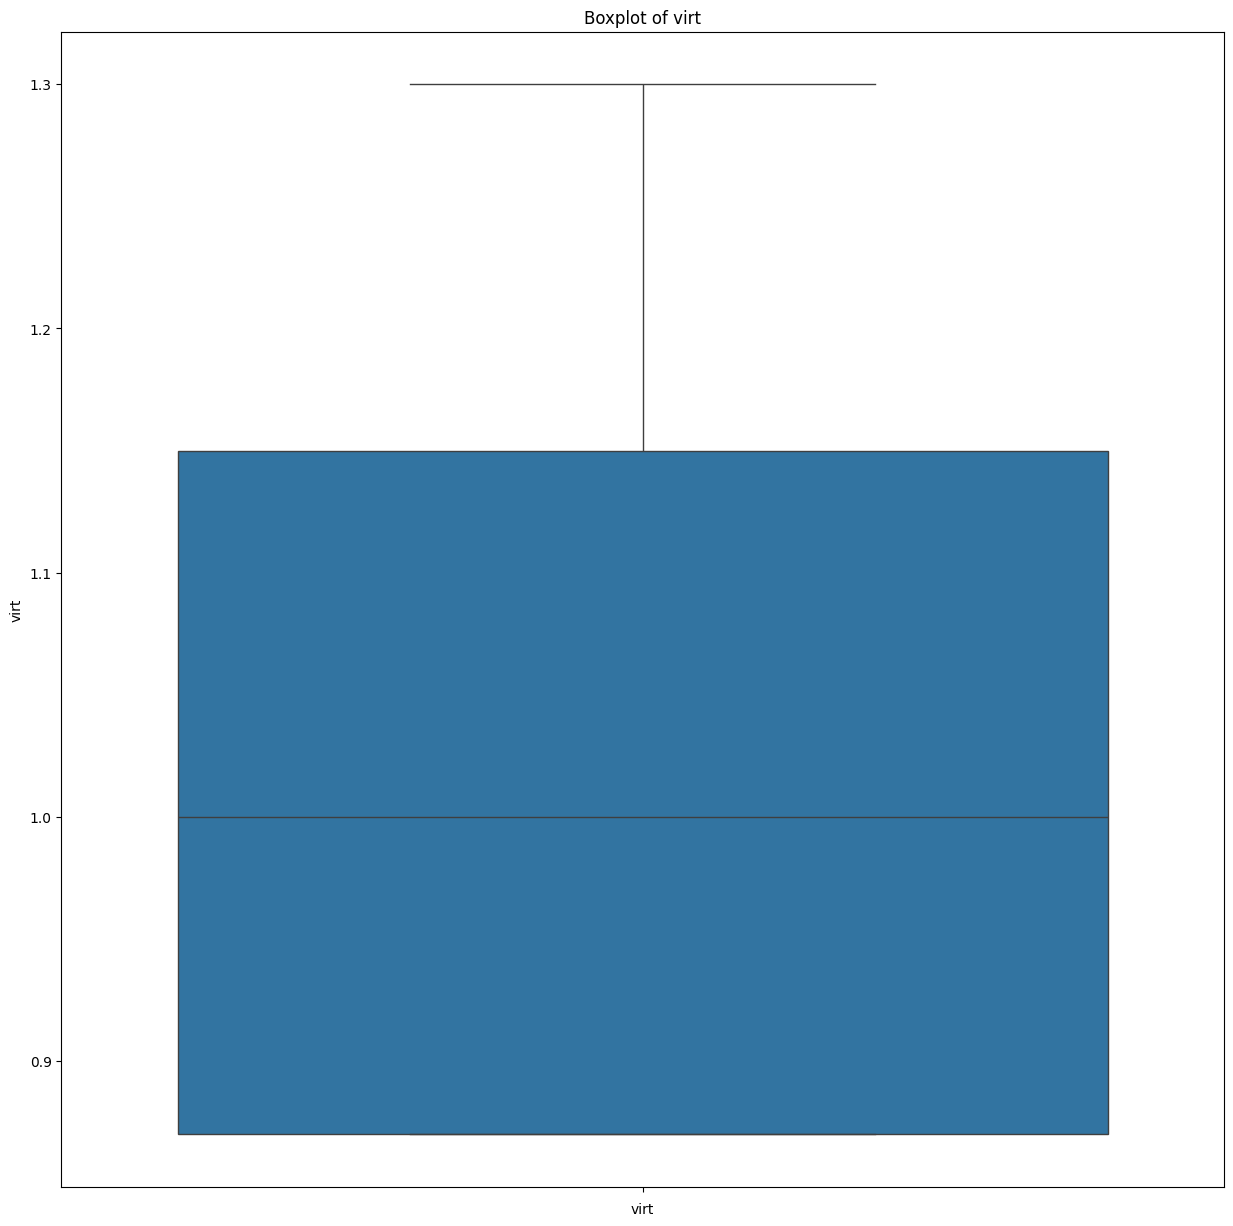

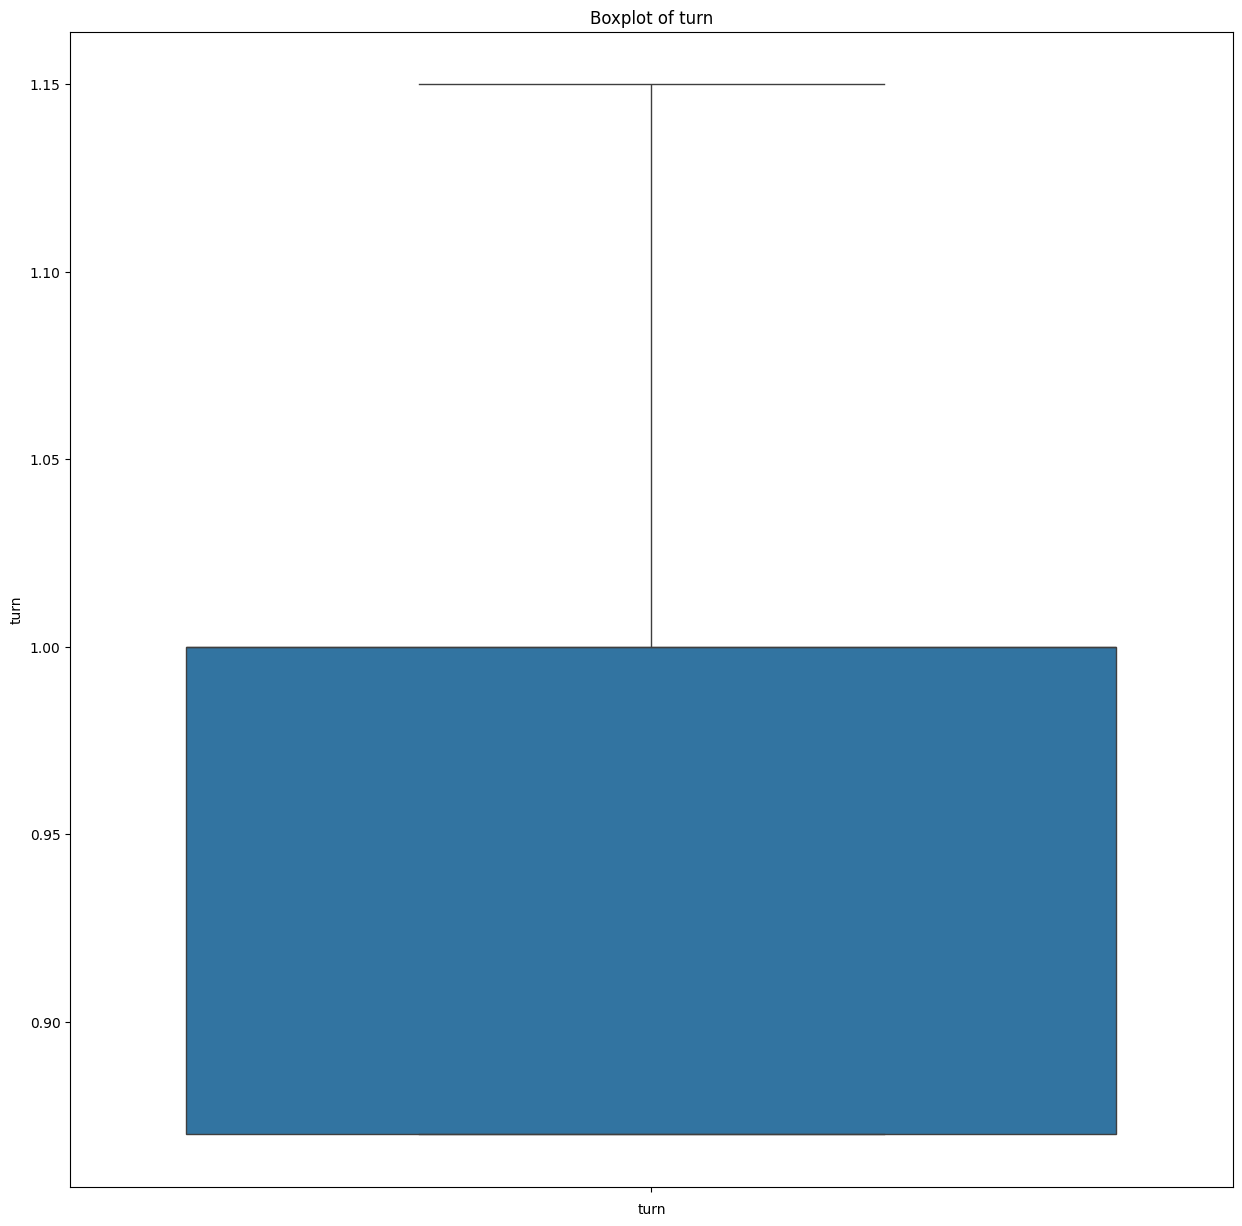

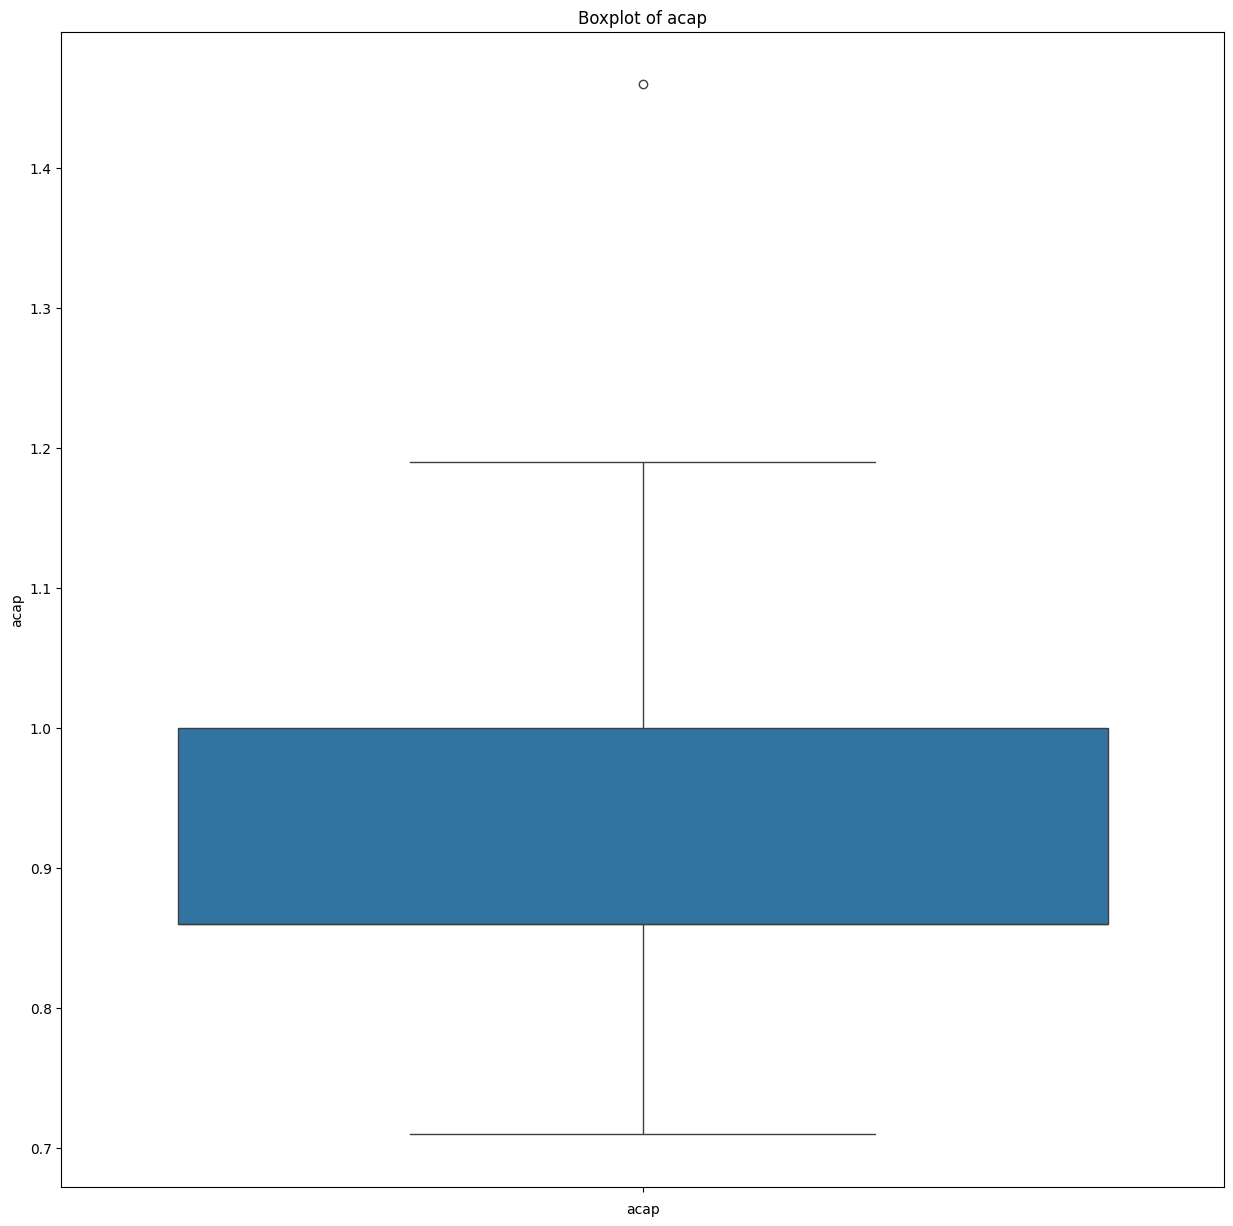

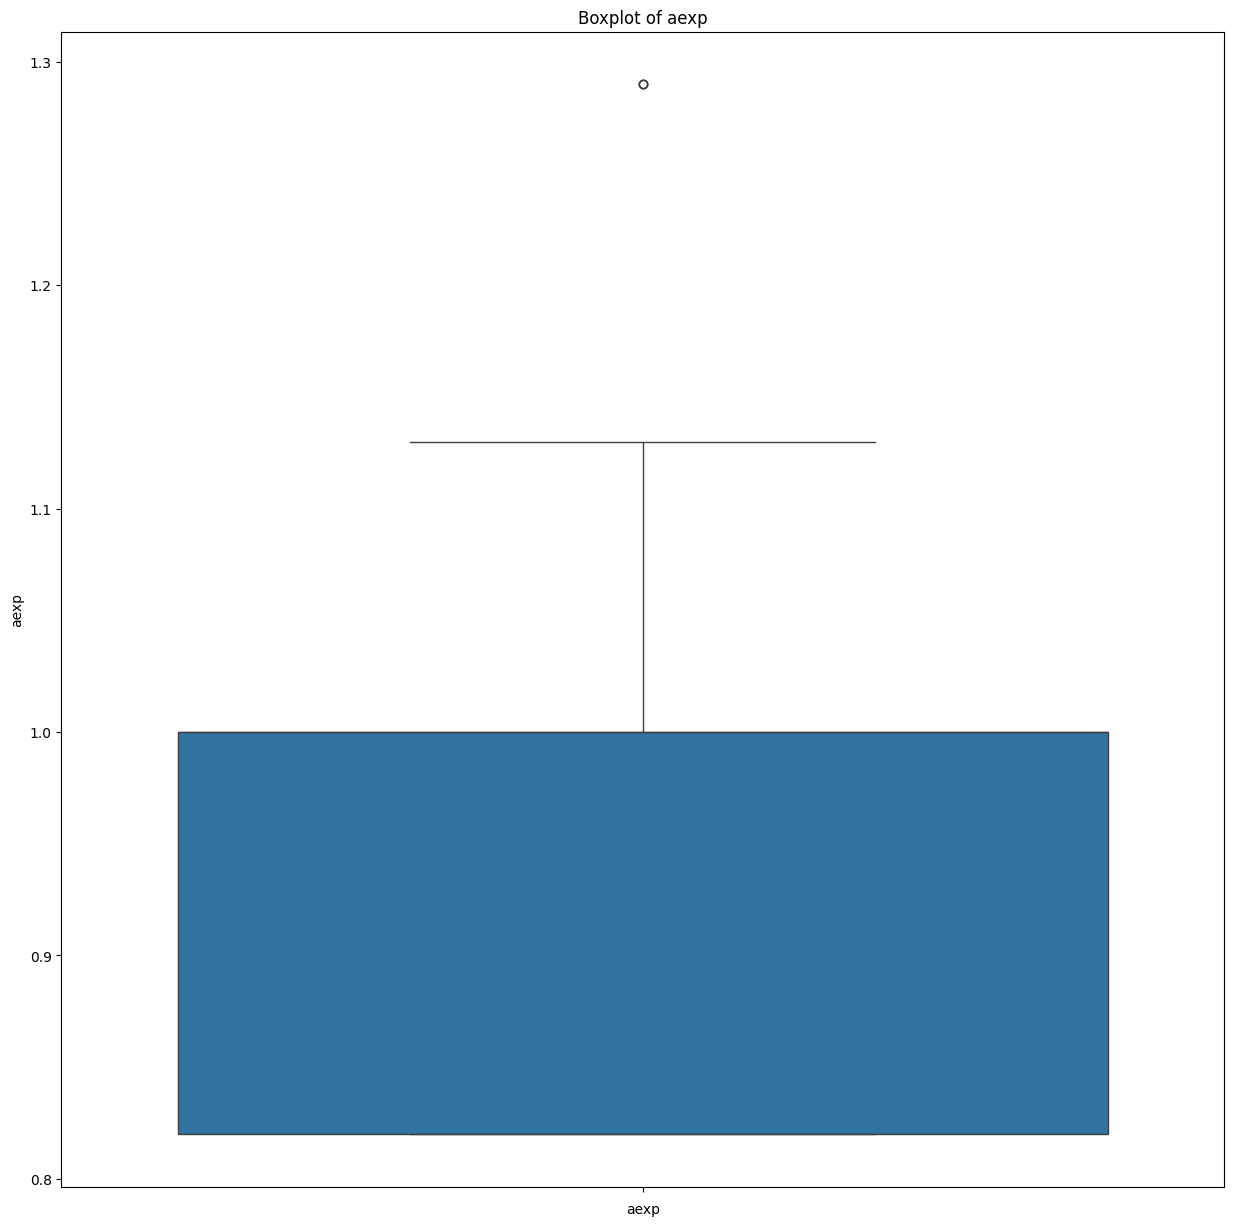

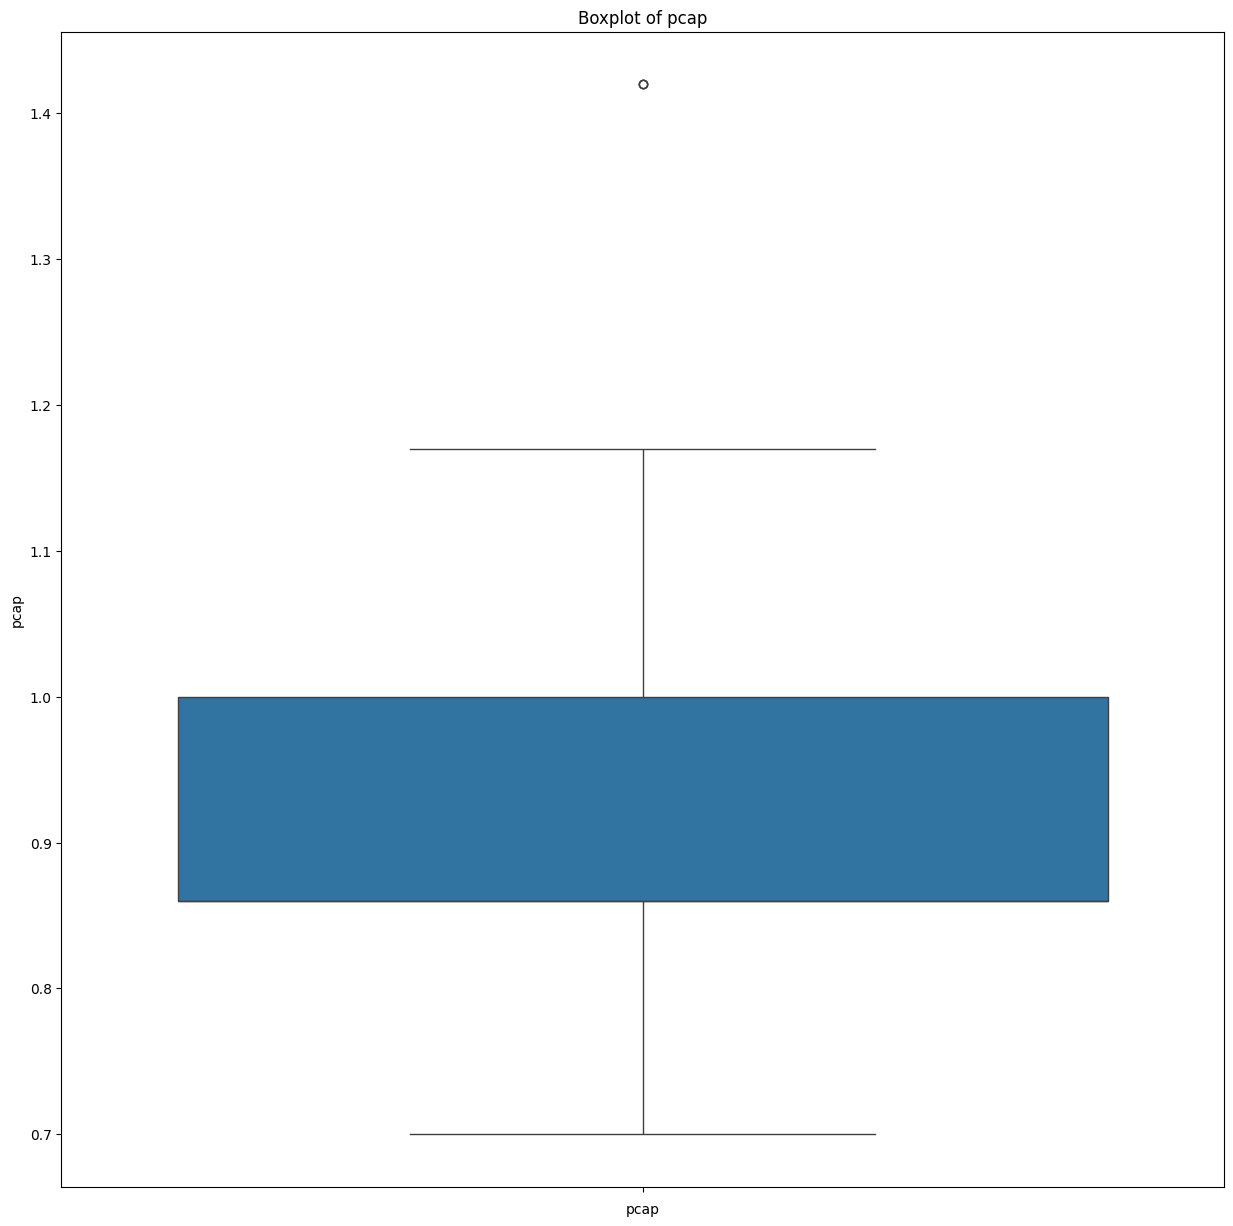

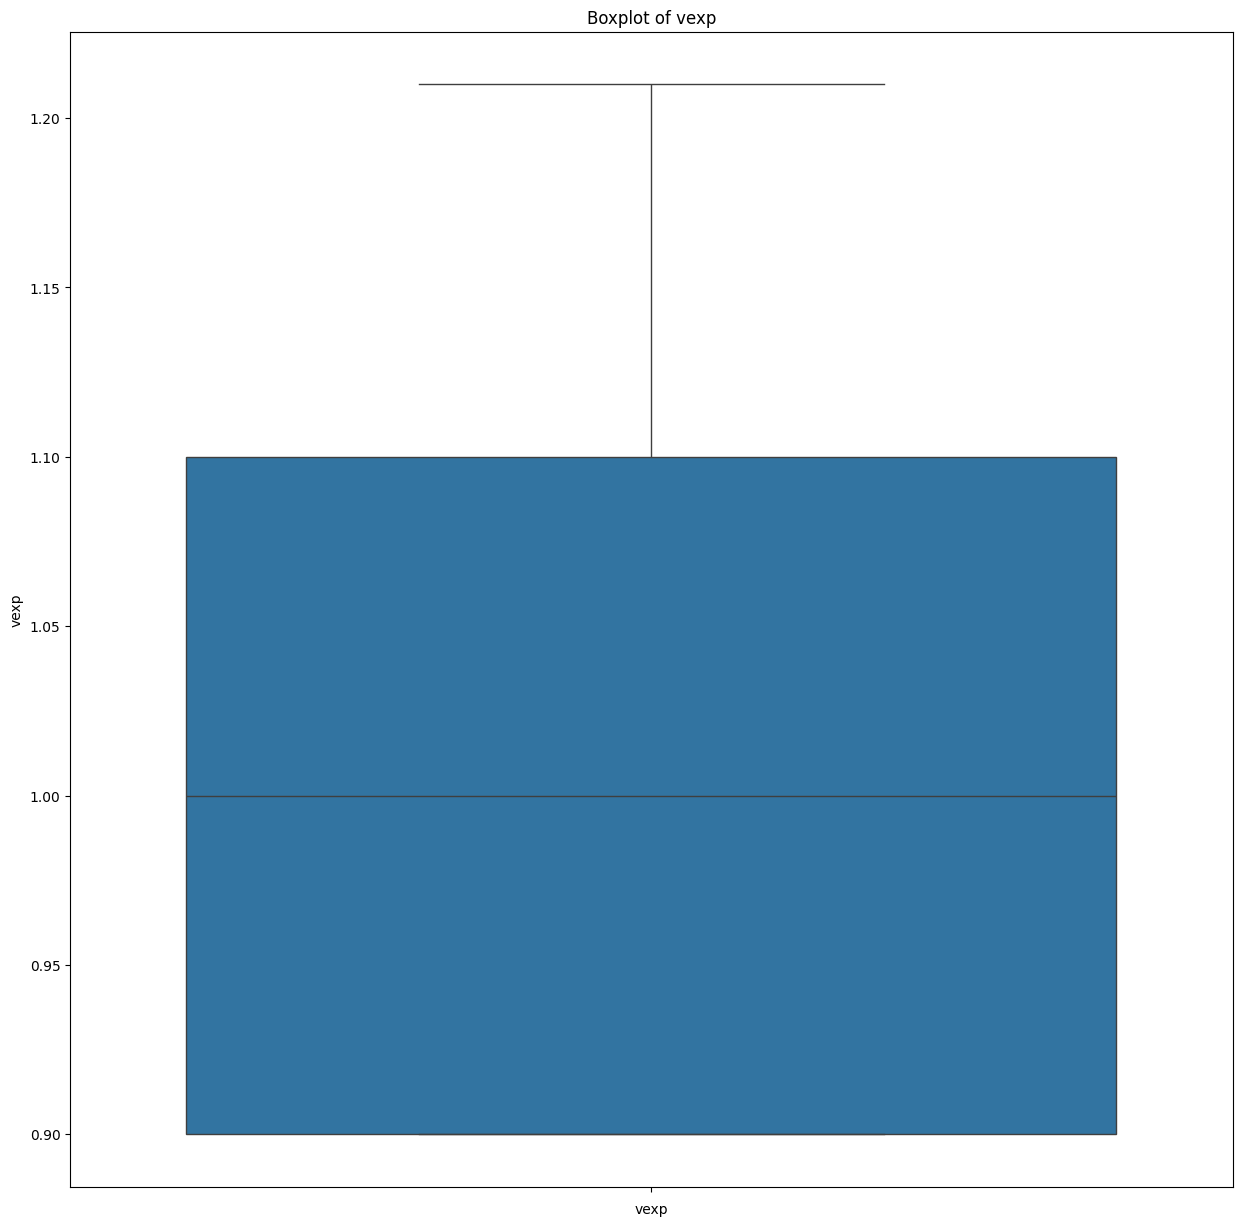

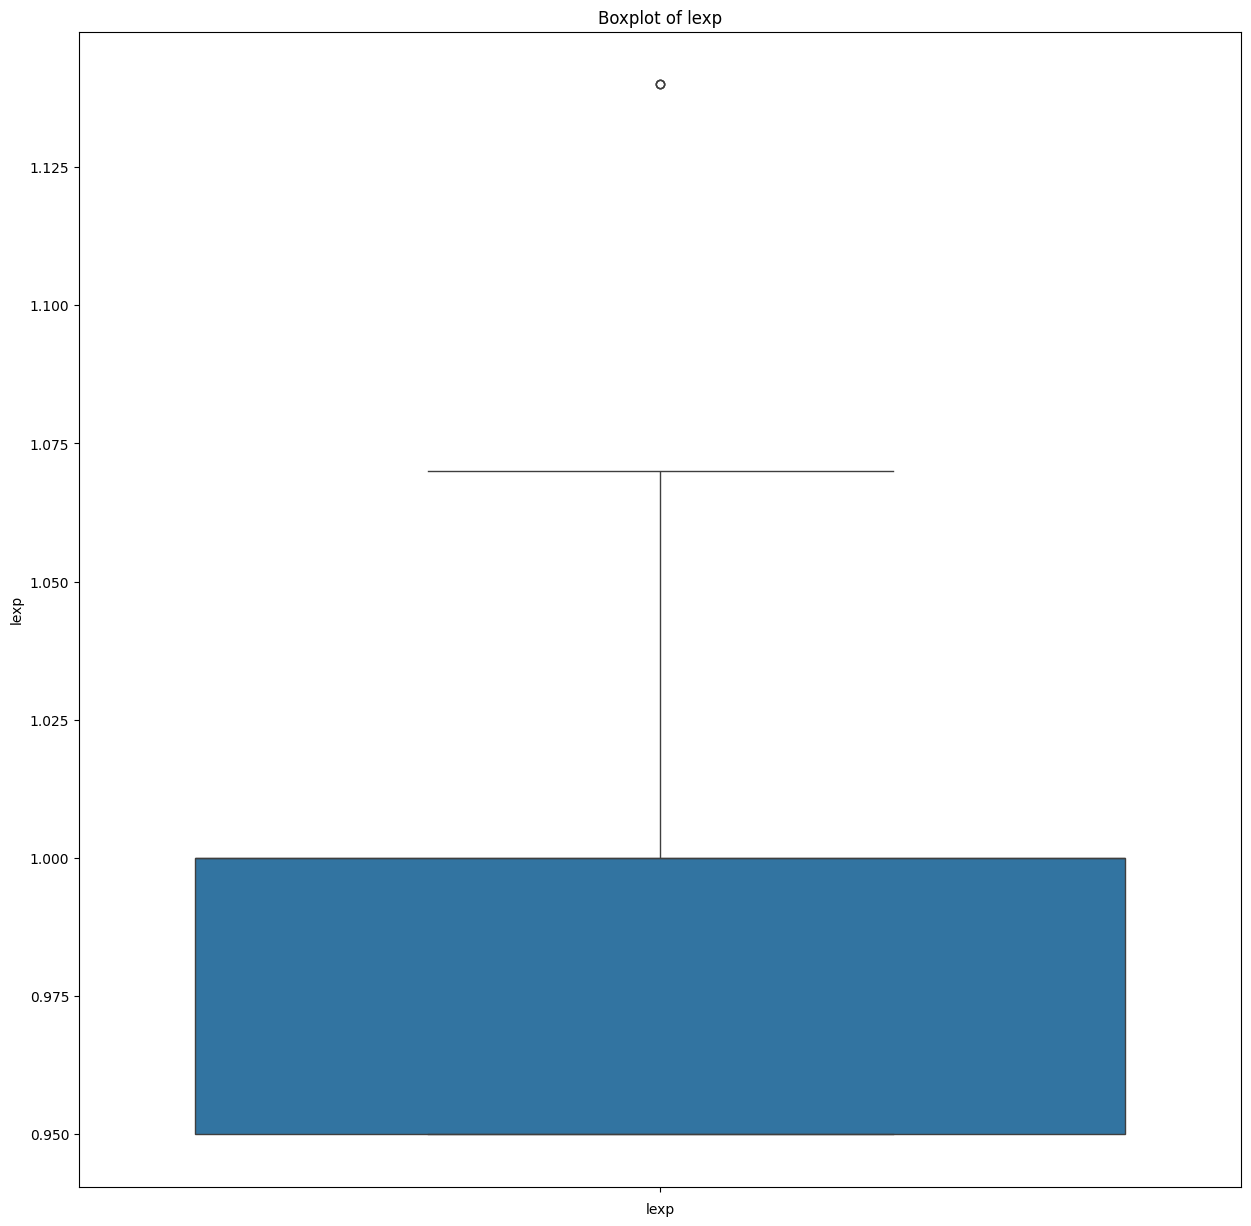

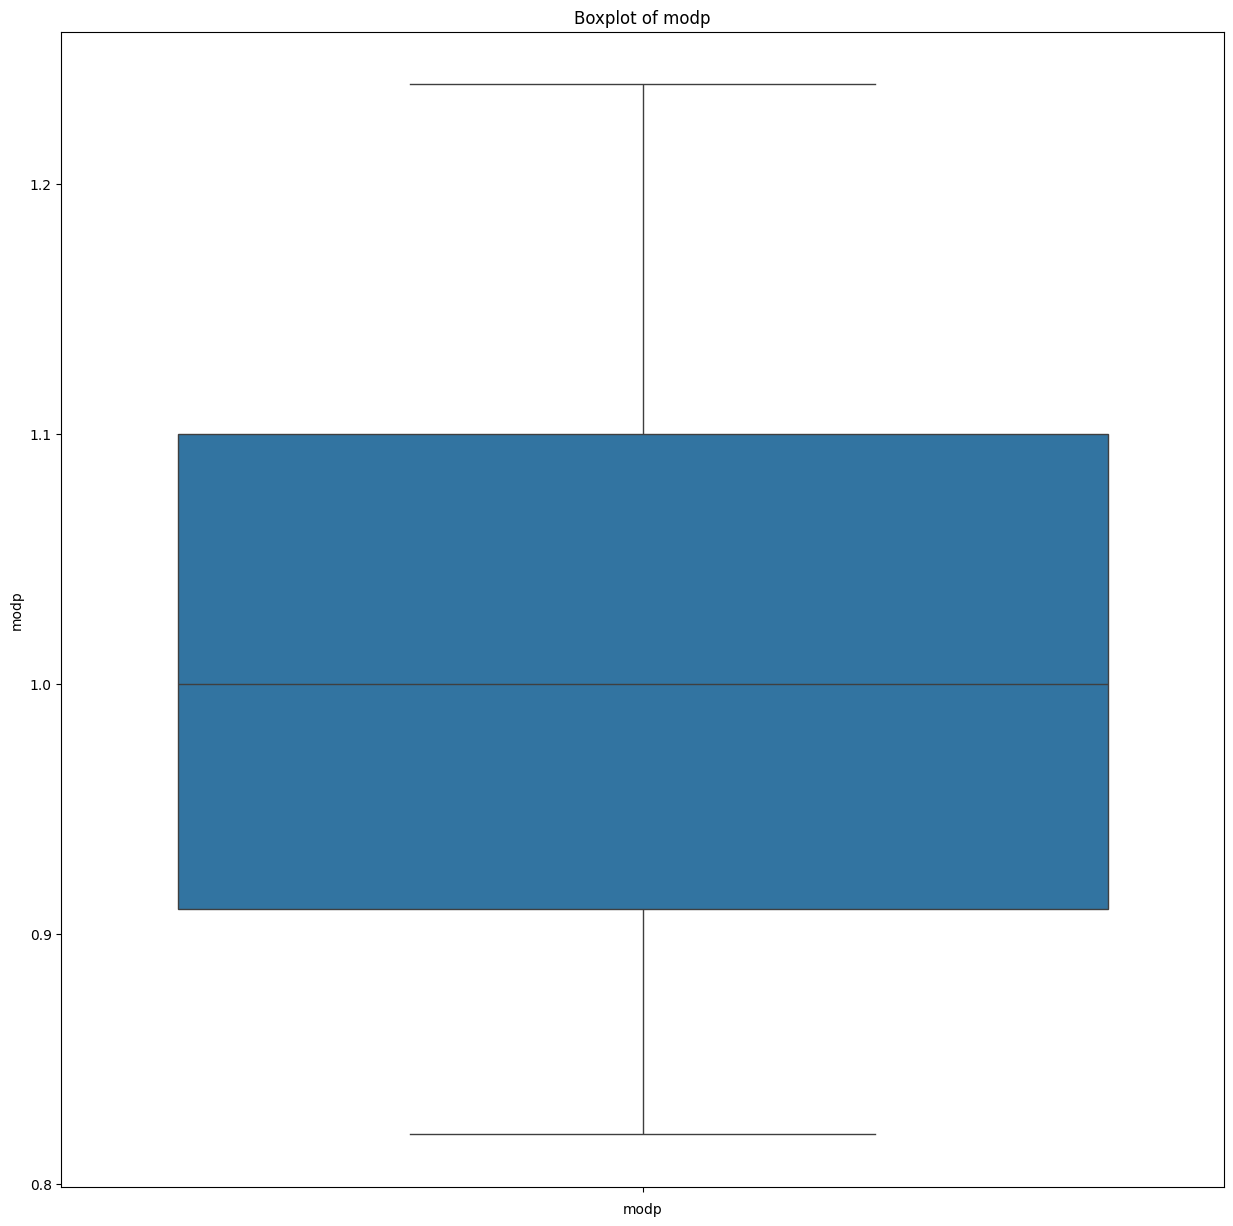

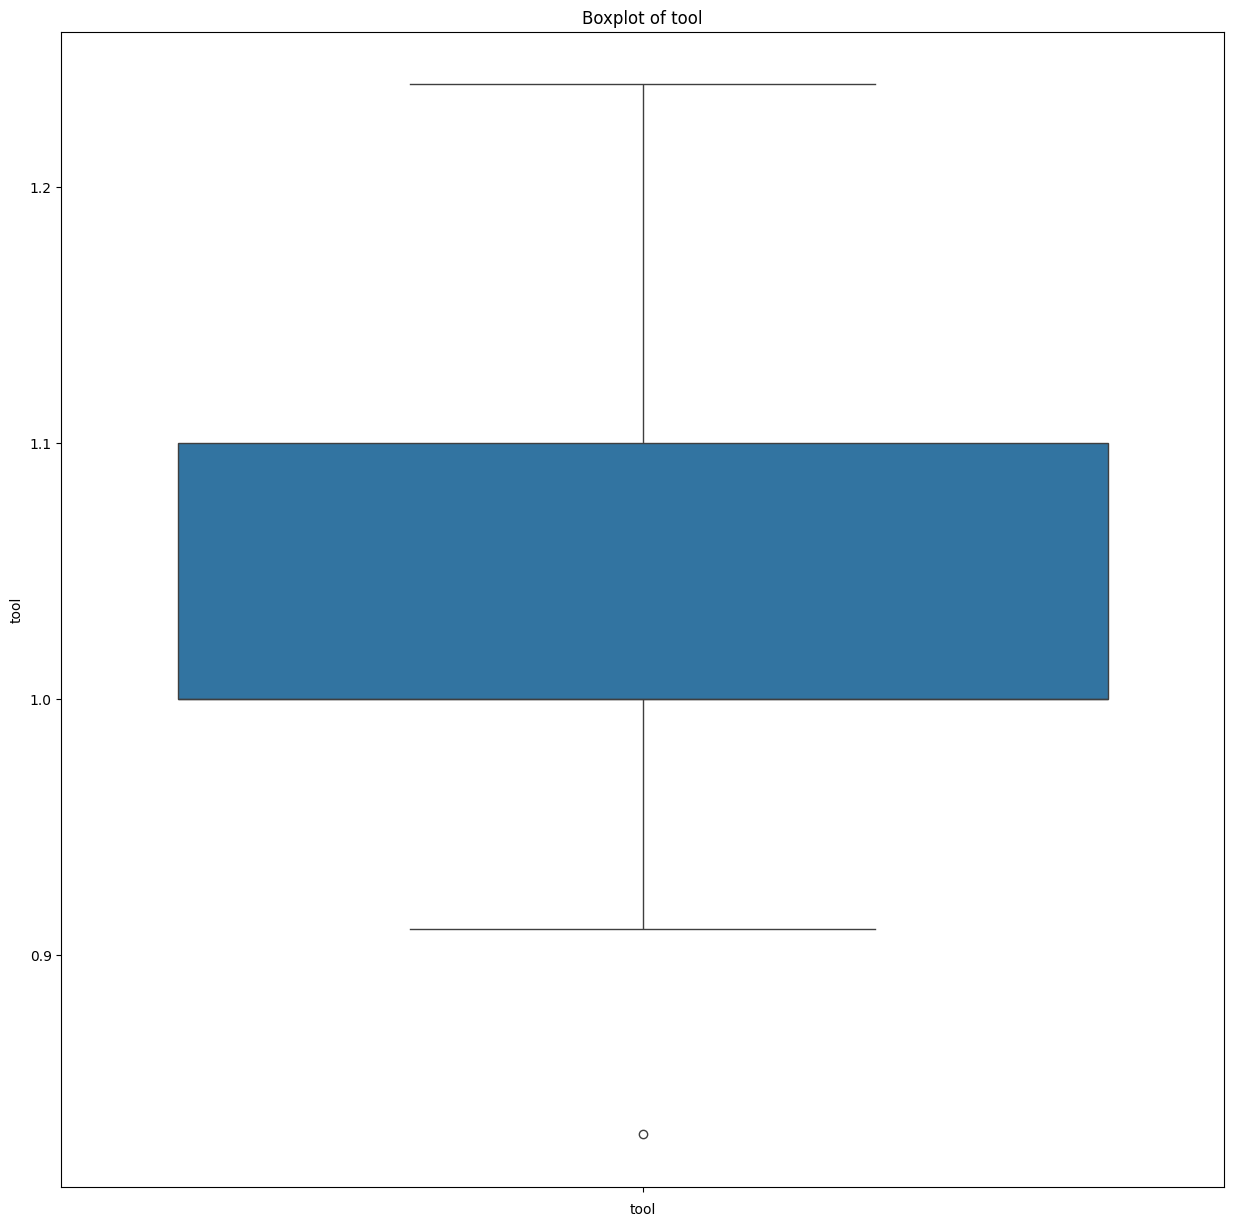

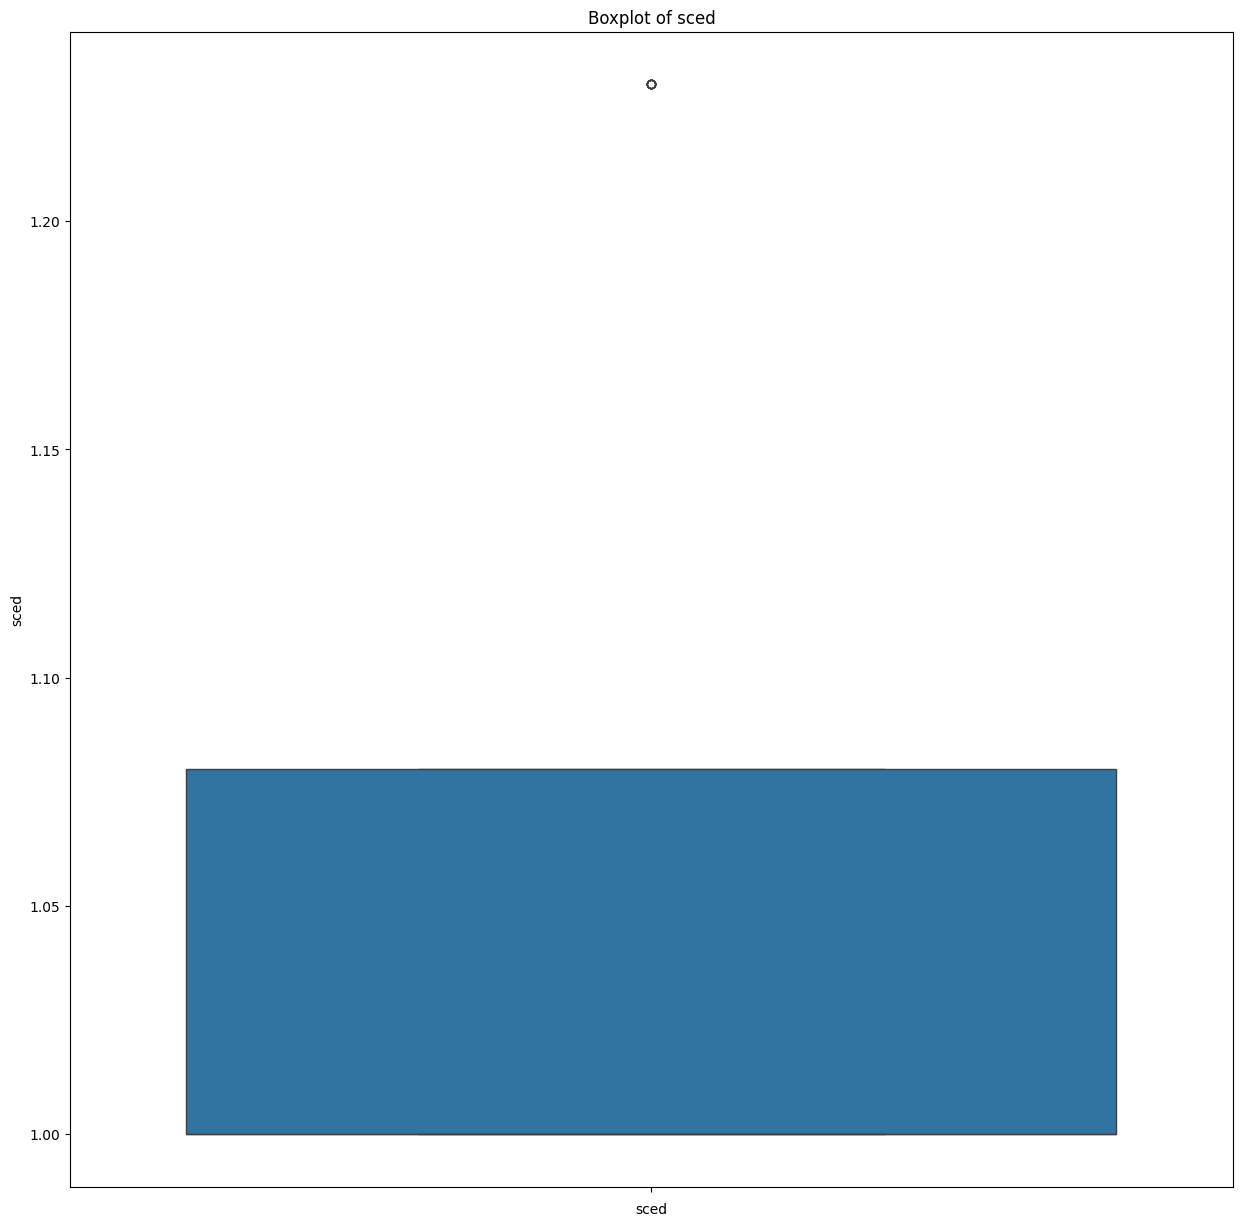

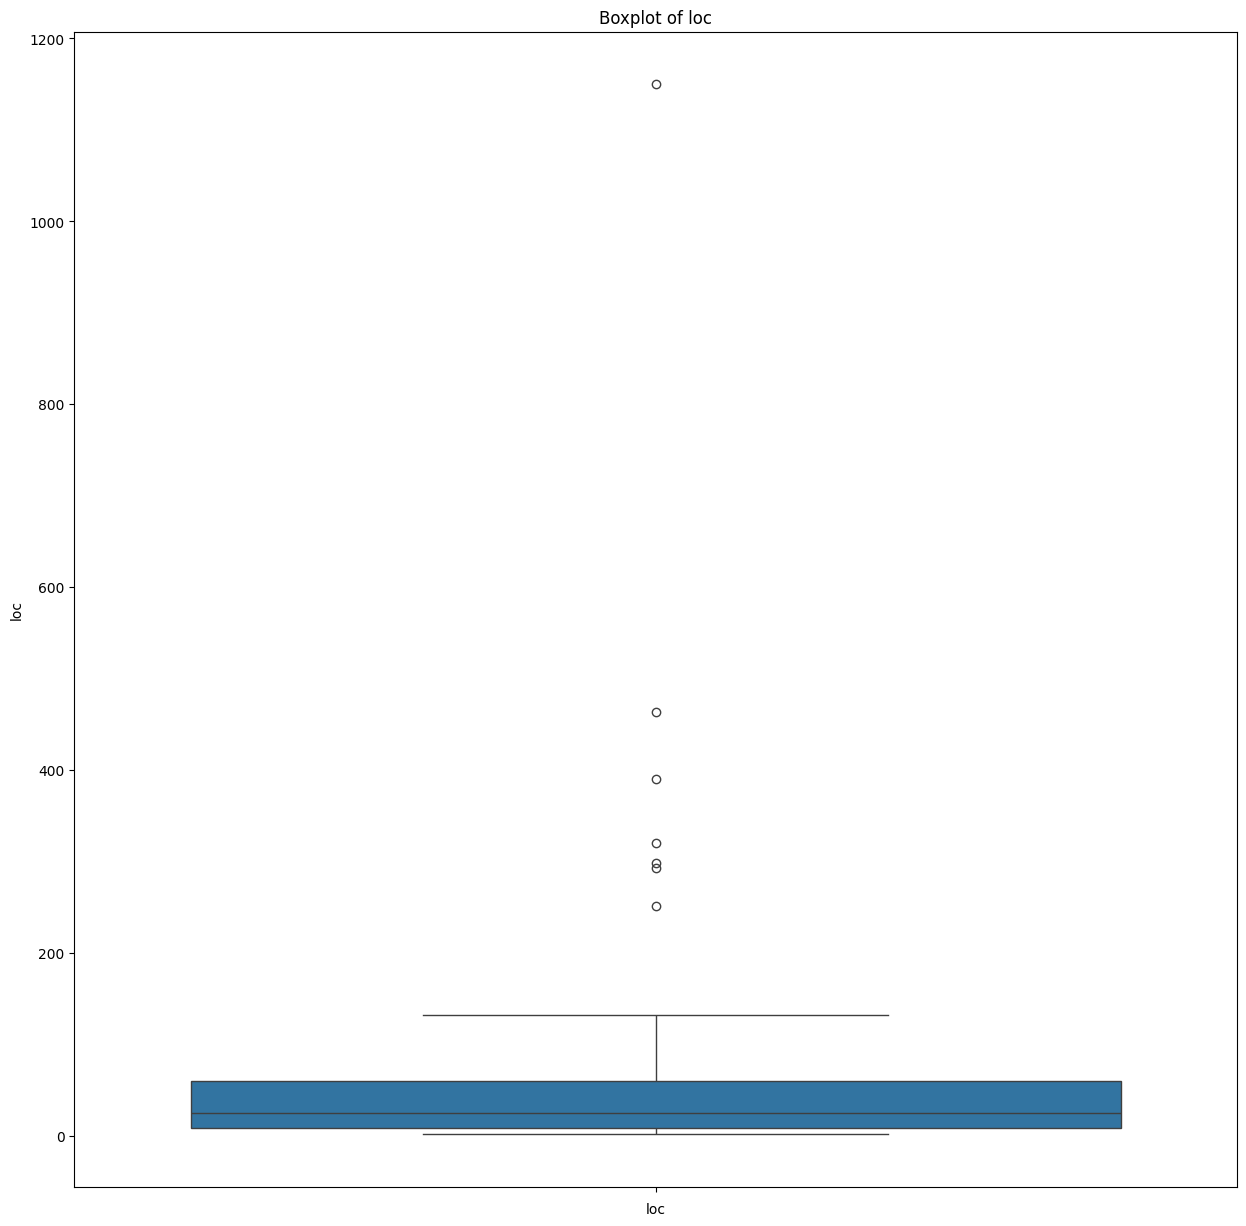

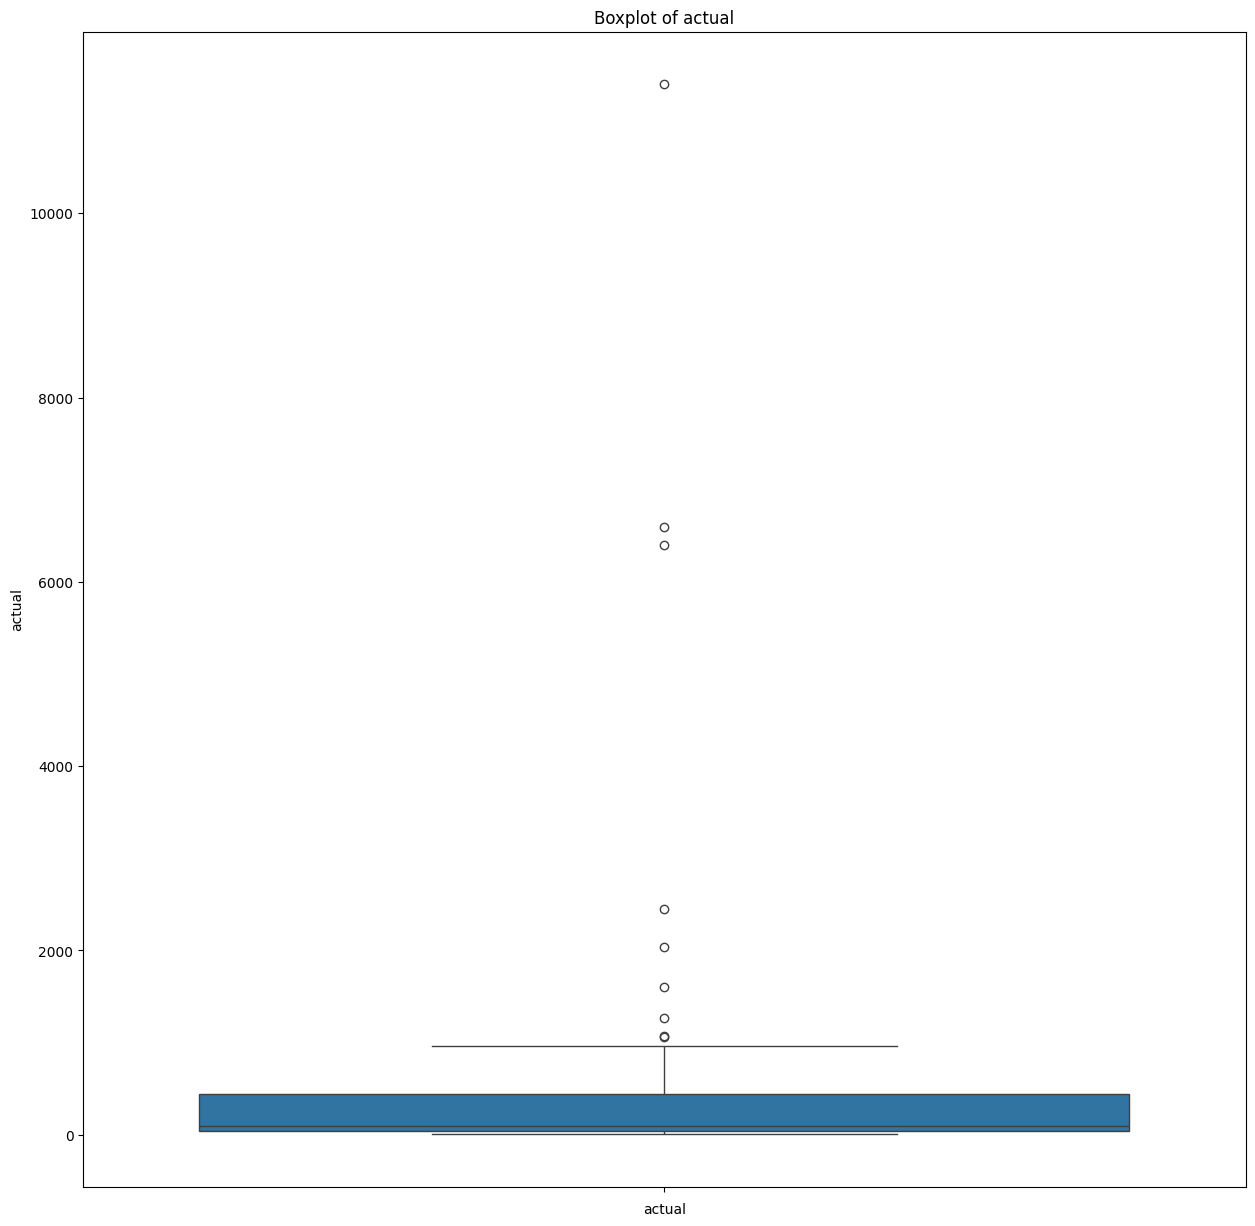

In [84]:
# Plotting boxplots for each numerical column
for col in cocomo.columns:
    plt.figure(figsize=(15,15))
    sns.boxplot(y=cocomo[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [85]:
trim_frac=0.01
for col in cocomo.columns:
    print(f'Trimmed Mean for {col} : {trim_mean(cocomo[col], proportiontocut=trim_frac)}')

Trimmed Mean for rely : 1.0363492063492064
Trimmed Mean for data : 1.0039682539682535
Trimmed Mean for cplx : 1.0914285714285714
Trimmed Mean for time : 1.1138095238095238
Trimmed Mean for stor : 1.1438095238095236
Trimmed Mean for virt : 1.0084126984126984
Trimmed Mean for turn : 0.9717460317460317
Trimmed Mean for acap : 0.9052380952380953
Trimmed Mean for aexp : 0.9485714285714286
Trimmed Mean for pcap : 0.9374603174603175
Trimmed Mean for vexp : 1.0052380952380953
Trimmed Mean for lexp : 1.0014285714285716
Trimmed Mean for modp : 1.004126984126984
Trimmed Mean for tool : 1.016984126984127
Trimmed Mean for sced : 1.0488888888888888
Trimmed Mean for loc : 77.20984126984126
Trimmed Mean for actual : 683.3206349206349


In [86]:
trim_frac = 0.05

trimmed_cocomo = pd.DataFrame()

for col in cocomo.columns:
    sorted_data = np.sort(cocomo[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_column_cocomo = np.full_like(cocomo[col], np.nan)
    trimmed_column_cocomo[lower_idx:upper_idx] = trimmed_data
    
    trimmed_cocomo[col] = trimmed_column_cocomo

trimmed_cocomo

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.75,0.94,0.70,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.82,0.91,1.00,3.0,8.0
4,0.75,0.94,0.81,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.82,0.91,1.00,3.6,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1.40,1.16,1.30,1.35,1.56,1.15,1.07,1.19,1.13,1.17,1.1,1.07,1.24,1.10,1.23,299.0,2040.0
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
trim_cocomo_cleaned=trimmed_cocomo.dropna()

trim_cocomo_cleaned

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
3,0.75,0.94,0.70,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.82,0.91,1.00,3.0,8.0
4,0.75,0.94,0.81,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.82,0.91,1.00,3.6,8.0
5,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.82,0.91,1.00,3.9,8.0
6,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.82,0.91,1.00,4.0,9.0
7,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.82,0.91,1.00,4.4,12.0
8,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.71,0.82,0.70,0.9,0.95,0.91,0.91,1.00,5.3,14.0
9,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.71,0.82,0.86,0.9,0.95,0.91,0.91,1.00,5.3,15.0
10,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.71,0.82,0.86,0.9,0.95,0.91,0.91,1.00,6.1,18.0
11,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.71,0.82,0.86,0.9,0.95,0.91,0.91,1.00,6.2,20.0
12,0.88,0.94,0.85,1.00,1.00,0.87,0.87,0.78,0.82,0.86,0.9,0.95,0.91,0.91,1.00,6.3,33.0


In [88]:

trimmed_median_dict = {}
trimmed_std_dict = {}

for col in trim_cocomo_cleaned.columns:
    sorted_data = np.sort(trim_cocomo_cleaned[col])
    
    lower_idx = int(len(sorted_data) * trim_frac)
    upper_idx = int(len(sorted_data) * (1 - trim_frac))
    
    trimmed_data = sorted_data[lower_idx:upper_idx]
    
    trimmed_median = np.median(trimmed_data)
    trimmed_median_dict[col] = trimmed_median
    
    trimmed_std = np.std(trimmed_data, ddof=1) 
    trimmed_std_dict[col] = trimmed_std

trimmed_median_cocomo = pd.DataFrame(list(trimmed_median_dict.items()), columns=['Column', 'Trimmed Median'])
trimmed_std_cocomo = pd.DataFrame(list(trimmed_std_dict.items()), columns=['Column', 'Trimmed Std Deviation'])

trimmed_median_cocomo

,Column,Trimmed Median
0,rely,1.00
1,data,1.00
2,cplx,1.07
3,time,1.06
4,stor,1.06
5,virt,1.00
6,turn,1.00
7,acap,0.86
8,aexp,1.00
9,pcap,0.86


In [89]:
trimmed_std_cocomo

,Column,Trimmed Std Deviation
0,rely,0.138626
1,data,0.051328
2,cplx,0.159929
3,time,0.099701
4,stor,0.108219
5,virt,0.095874
6,turn,0.072627
7,acap,0.095220
8,aexp,0.081127
9,pcap,0.099442


China